In [4]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('clean_data_final_1.22.csv', encoding="latin-1")
df

/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_91671/1603014435.py:7: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_data_final_1.22.csv', encoding="latin-1")


,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal,Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal,Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal,Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,Accident,1979-08-02,"Canton, OH",United States,Fatal,Destroyed,NaN,Cessna,501,No,2.0,NaN,Personal,1.0,2.0,2.0,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84601,Accident,2022-12-21,"Reserve, LA",United States,Minor,NaN,NaN,GRUMMAN AMERICAN AVN. CORP.,AA-5B,No,1.0,NaN,Instructional,0.0,1.0,1.0,1.0,NaN,NaN,NaN
84602,Accident,2022-12-22,"Brasnorte,",Brazil,Fatal,NaN,NaN,AIR TRACTOR,AT502,No,1.0,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN
84603,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,PIPER,PA-28-151,No,1.0,NaN,Personal,0.0,1.0,1.0,0.0,NaN,NaN,NaN
84604,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84606 entries, 0 to 84605
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      84606 non-null  object 
 1   Event.Date              84606 non-null  object 
 2   Location                84566 non-null  object 
 3   Country                 84400 non-null  object 
 4   Injury.Severity         84606 non-null  object 
 5   Aircraft.damage         83203 non-null  object 
 6   Aircraft.Category       30171 non-null  object 
 7   Make                    84573 non-null  object 
 8   Model                   84549 non-null  object 
 9   Amateur.Built           84548 non-null  object 
 10  Number.of.Engines       84606 non-null  float64
 11  Engine.Type             79111 non-null  object 
 12  Purpose.of.flight       80598 non-null  object 
 13  Total.Fatal.Injuries    84606 non-null  float64
 14  Total.Serious.Injuries  84606 non-null

In [6]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month

print(df[['Event.Date', 'Year', 'Month']])

      Event.Date  Year  Month
0     1948-10-24  1948     10
1     1962-07-19  1962      7
2     1974-08-30  1974      8
3     1977-06-19  1977      6
4     1979-08-02  1979      8
...          ...   ...    ...
84601 2022-12-21  2022     12
84602 2022-12-22  2022     12
84603 2022-12-26  2022     12
84604 2022-12-26  2022     12
84605 2022-12-29  2022     12

[84606 rows x 3 columns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84606 entries, 0 to 84605
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      84606 non-null  object        
 1   Event.Date              84606 non-null  datetime64[ns]
 2   Location                84566 non-null  object        
 3   Country                 84400 non-null  object        
 4   Injury.Severity         84606 non-null  object        
 5   Aircraft.damage         83203 non-null  object        
 6   Aircraft.Category       30171 non-null  object        
 7   Make                    84573 non-null  object        
 8   Model                   84549 non-null  object        
 9   Amateur.Built           84548 non-null  object        
 10  Number.of.Engines       84606 non-null  float64       
 11  Engine.Type             79111 non-null  object        
 12  Purpose.of.flight       80598 non-null  object

In [8]:
print(df['Injury.Severity'].value_counts())

Injury.Severity
Non-Fatal      66330
Fatal          17801
Minor            211
Serious          168
Unavailable       96
Name: count, dtype: int64


In [9]:
df['Make'] = df['Make'].str.lower()

In [10]:
airbus_mapping = {
    'airbus': 'airbus industries',
    'airbus industrie': 'airbus industries'
}

df['Make'] = df['Make'].replace(airbus_mapping)

In [11]:
filtered_df = df[(df['Year'] >= 2013) & (df['Year'] <= 2023)]

print(filtered_df[['Event.Date', 'Year', 'Month']])

      Event.Date  Year  Month
70205 2013-01-01  2013      1
70206 2013-01-02  2013      1
70207 2013-01-02  2013      1
70208 2013-01-02  2013      1
70209 2013-01-02  2013      1
...          ...   ...    ...
84601 2022-12-21  2022     12
84602 2022-12-22  2022     12
84603 2022-12-26  2022     12
84604 2022-12-26  2022     12
84605 2022-12-29  2022     12

[14401 rows x 3 columns]


In [12]:
damage_v_fatalities = filtered_df.groupby('Aircraft.damage')['Total.Fatal.Injuries'].agg(['sum','mean']).reset_index()
print(damage_v_fatalities)

  Aircraft.damage     sum      mean
0       Destroyed  6184.0  2.960268
1           Minor    16.0  0.141593
2     Substantial  2420.0  0.205800


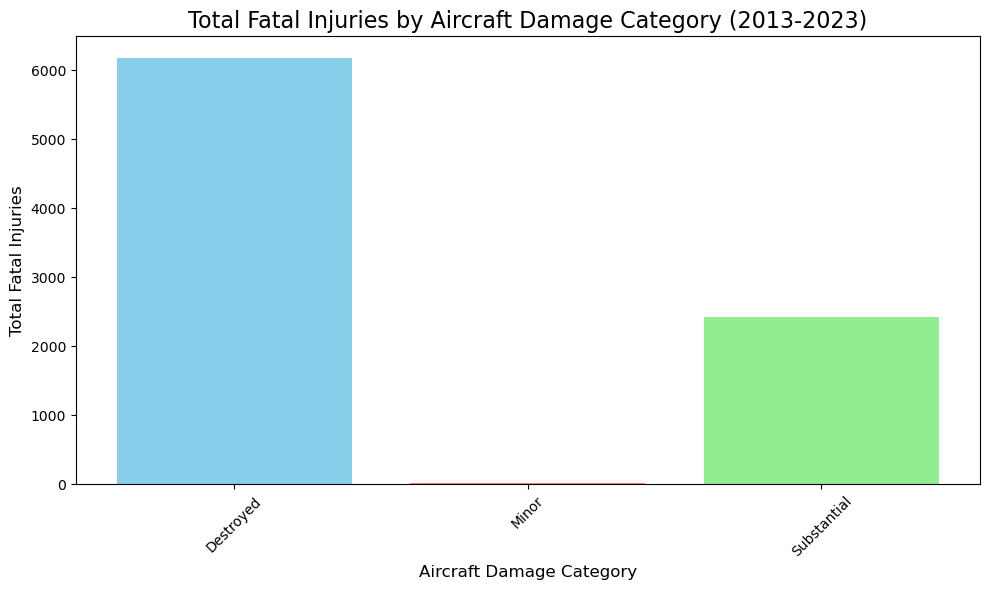

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(damage_v_fatalities['Aircraft.damage'], damage_v_fatalities['sum'], color=['skyblue', 'salmon', 'lightgreen'])

plt.title('Total Fatal Injuries by Aircraft Damage Category (2013-2023)', fontsize=16)
plt.xlabel('Aircraft Damage Category', fontsize=12)
plt.ylabel('Total Fatal Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [14]:
yearly_damage_fatalities = (
    filtered_df.groupby(['Year', 'Aircraft.damage'])['Total.Fatal.Injuries']
    .sum()
    .reset_index()
)
print(yearly_damage_fatalities.head())

   Year Aircraft.damage  Total.Fatal.Injuries
0  2013       Destroyed                 554.0
1  2013           Minor                   2.0
2  2013     Substantial                 260.0
3  2014       Destroyed                1146.0
4  2014           Minor                   0.0


In [15]:
pivot_yearly_damage = yearly_damage_fatalities.pivot(
    index='Year', columns='Aircraft.damage', values='Total.Fatal.Injuries'
).fillna(0)

print(pivot_yearly_damage)

Aircraft.damage  Destroyed  Minor  Substantial
Year                                          
2013                 554.0    2.0        260.0
2014                1146.0    0.0        279.0
2015                 843.0    8.0        233.0
2016                 561.0    0.0        254.0
2017                 359.0    1.0        268.0
2018                 782.0    1.0        251.0
2019                 665.0    2.0        279.0
2020                 568.0    0.0        188.0
2021                 328.0    0.0        183.0
2022                 378.0    2.0        225.0


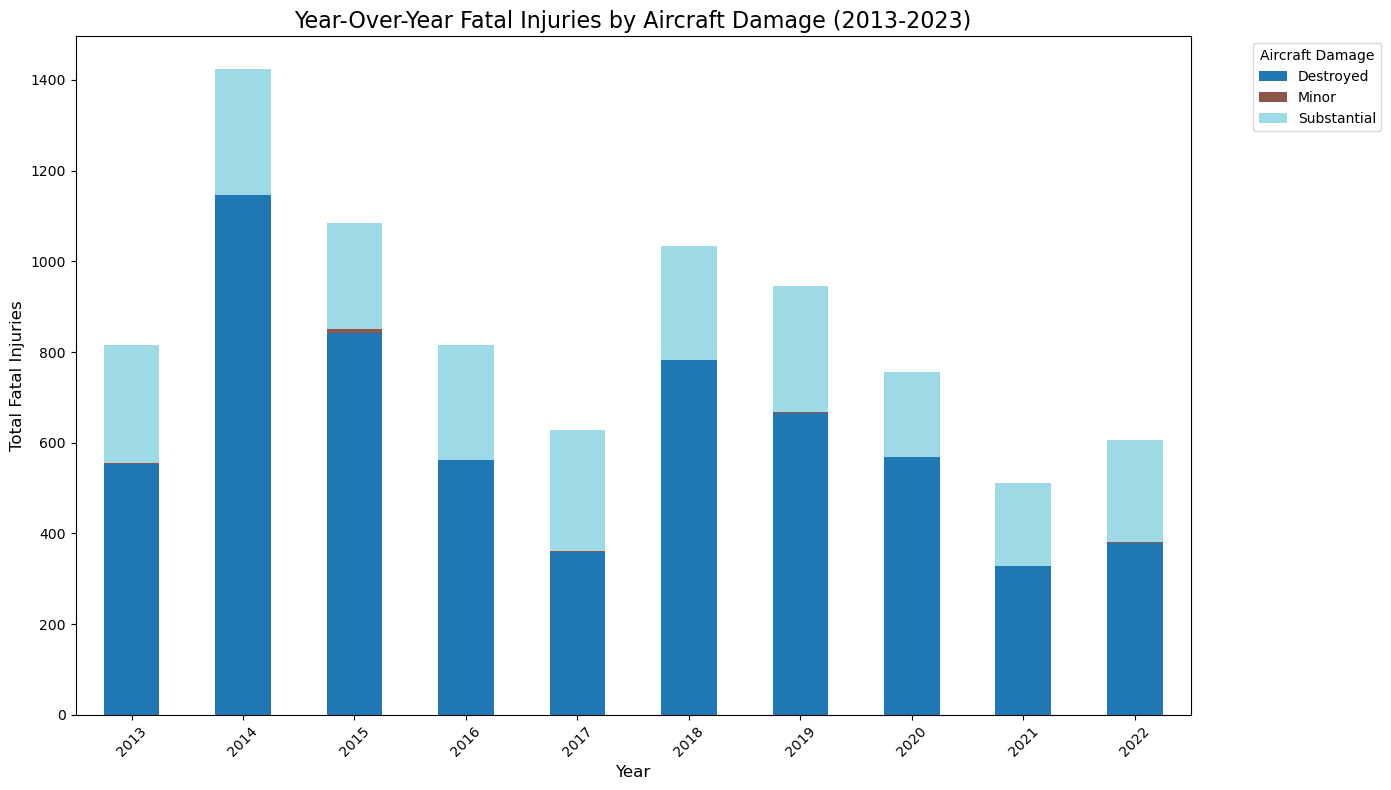

In [16]:
pivot_yearly_damage.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20')
plt.title('Year-Over-Year Fatal Injuries by Aircraft Damage (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Fatal Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [17]:
damage_make_fatalities = (
    filtered_df.groupby(['Year', 'Make', 'Aircraft.damage'])['Total.Fatal.Injuries']
    .sum()
    .reset_index()
)
damage_make_fatalities

,Year,Make,Aircraft.damage,Total.Fatal.Injuries
0,2013,781569 inc,Substantial,0.0
1,2013,adolphson,Substantial,0.0
2,2013,aero commander,Substantial,0.0
3,2013,aero vodochody,Substantial,0.0
4,2013,aeronca,Destroyed,2.0
...,...,...,...,...
4073,2022,wren ronnie d,Substantial,2.0
4074,2022,yakovlev,Destroyed,1.0
4075,2022,yakovlev,Substantial,0.0
4076,2022,yates mike e,Substantial,0.0


In [18]:
damage_make_fatalities['Rank'] = damage_make_fatalities.groupby('Year')['Total.Fatal.Injuries'].rank(ascending=False)
top_5_damage_makes = damage_make_fatalities[damage_make_fatalities['Rank'] <= 5]

print(top_5_damage_makes)

      Year               Make Aircraft.damage  Total.Fatal.Injuries  Rank
56    2013              beech       Destroyed                  64.0   3.0
73    2013             boeing       Destroyed                  60.0   5.0
99    2013             cessna       Destroyed                  89.0   1.0
101   2013             cessna     Substantial                  61.0   4.0
313   2013              piper       Destroyed                  66.0   2.0
456   2014  airbus industries       Destroyed                 162.0   2.0
475   2014                atr       Destroyed                  58.0   5.0
504   2014             boeing       Destroyed                 535.0   1.0
526   2014             cessna       Destroyed                  90.0   3.0
777   2014              piper       Destroyed                  68.0   4.0
931   2015  airbus industries       Destroyed                 374.0   1.0
963   2015              beech       Destroyed                  60.0   4.0
1014  2015             cessna       De

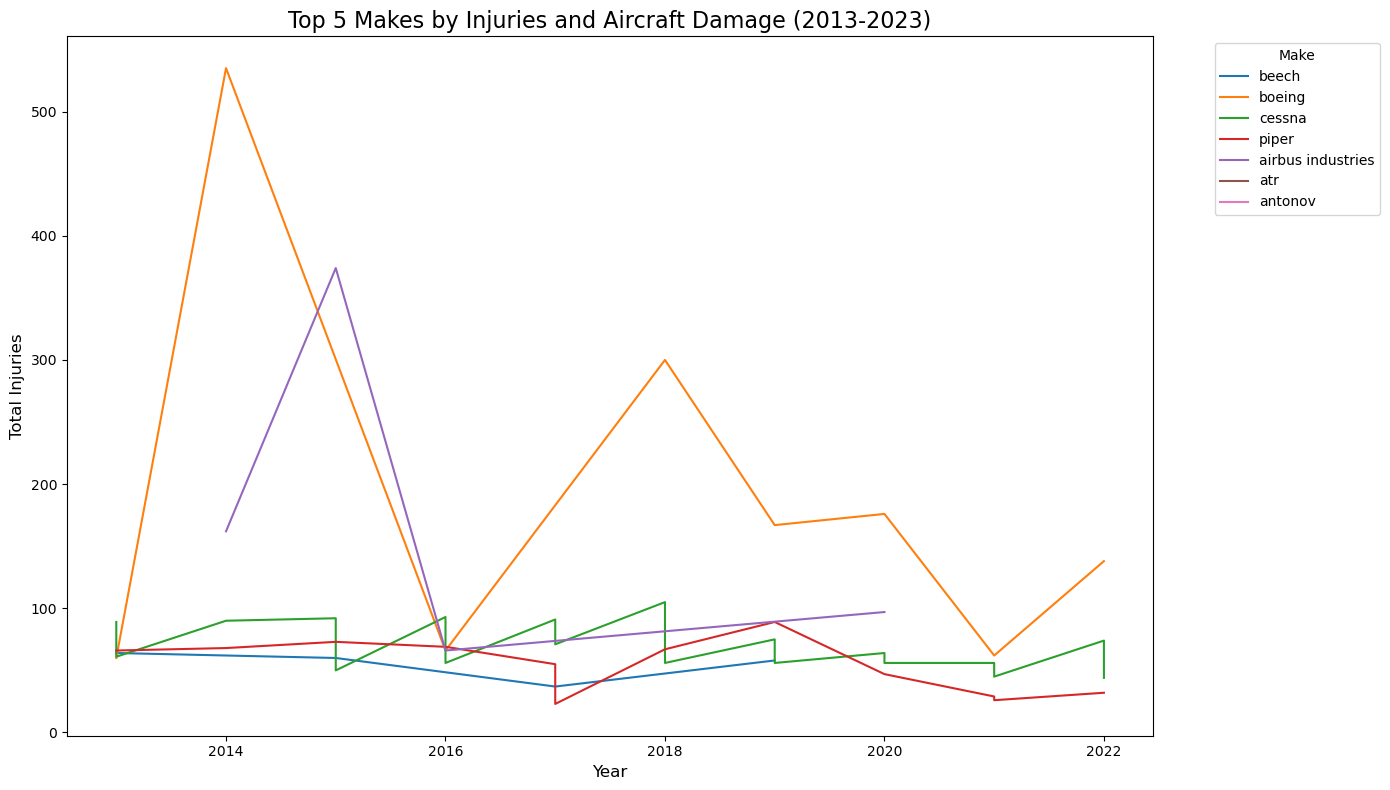

In [19]:
plt.figure(figsize=(14, 8))

for make in top_5_damage_makes['Make'].unique():
    yearly_data = top_5_damage_makes[top_5_damage_makes['Make'] == make]
    plt.plot(yearly_data['Year'], yearly_data['Total.Fatal.Injuries'], label=make)

plt.title('Top 5 Makes by Injuries and Aircraft Damage (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Injuries', fontsize=12)
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In the above graph data stops for Airbus after 2020. The next 2-3 cells will be data pertaining to Airbus, followed by Beech (data stops 2019), Piper, and Cesna. Their low fatal injuries might indicate that they're strong companies to work with.

In [20]:
airbus_df = filtered_df[(filtered_df['Make'] == 'airbus industries') & (filtered_df['Year'] >= 2013 ) & (filtered_df['Year'] <= 2023)]

In [21]:
airbus_quant_columns = [
    'Injury.Severity',
    'Total.Uninjured',
]

print(airbus_quant_columns)

['Injury.Severity', 'Total.Uninjured']


In [22]:
airbus_summary = airbus_df[airbus_quant_columns].describe()
print(airbus_summary)

       Total.Uninjured
count        85.000000
mean        110.788235
std         108.339534
min           0.000000
25%           2.000000
50%         115.000000
75%         162.000000
max         521.000000


In [23]:
airbus_yearly_data = (
    airbus_df.groupby('Year')[airbus_quant_columns]
    .sum()
    .reset_index()
)

print(airbus_yearly_data)

   Year                                    Injury.Severity  Total.Uninjured
0  2013  Non-FatalNon-FatalNon-FatalNon-FatalFatalNon-F...           1167.0
1  2014  Non-FatalNon-FatalNon-FatalNon-FatalNon-FatalF...            784.0
2  2015  Non-FatalFatalNon-FatalNon-FatalNon-FatalNon-F...            864.0
3  2016  Non-FatalNon-FatalNon-FatalFatalNon-FatalFatal...            483.0
4  2017  Non-FatalNon-FatalNon-FatalNon-FatalNon-FatalN...           2171.0
5  2018  Non-FatalNon-FatalNon-FatalNon-FatalNon-FatalN...           1282.0
6  2019  Non-FatalNon-FatalNon-FatalNon-FatalNon-FatalN...            771.0
7  2020                   Non-FatalNon-FatalFatalNon-Fatal            297.0
8  2021      Non-FatalNon-FatalNon-FatalNon-FatalNon-Fatal            726.0
9  2022  SeriousNon-FatalSeriousSeriousNon-FatalSerious...            872.0


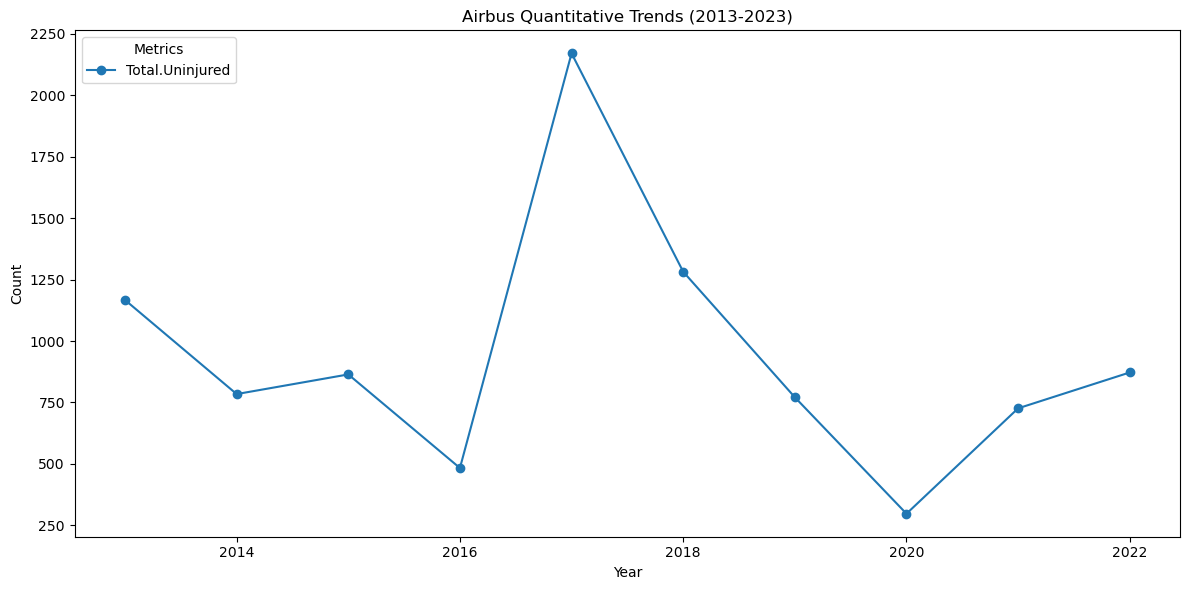

In [24]:
airbus_yearly_data.plot(x='Year', figsize=(12, 6), marker='o', title='Airbus Quantitative Trends (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Metrics', loc='upper left')
plt.tight_layout()
plt.show()

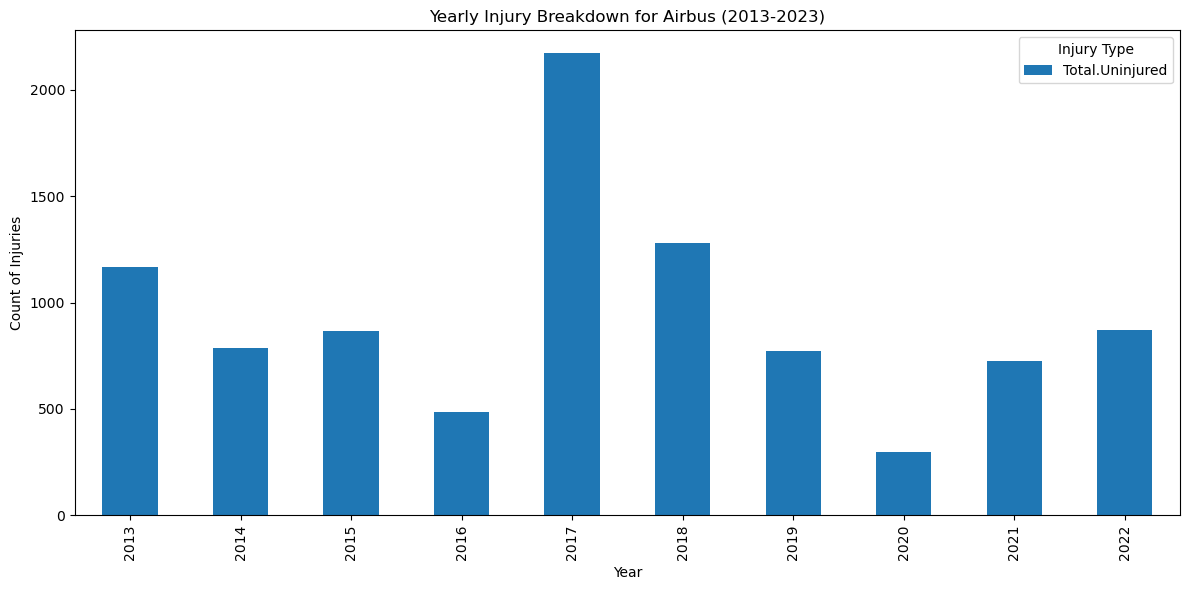

In [25]:
injury_columns = ['Injury.Severity', 'Total.Uninjured']
airbus_yearly_injuries = airbus_yearly_data[['Year'] + injury_columns].set_index('Year')

airbus_yearly_injuries.plot(kind='bar', stacked=True, figsize=(12, 6), title='Yearly Injury Breakdown for Airbus (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Count of Injuries')
plt.legend(title='Injury Type')
plt.tight_layout()
plt.show()

In [26]:
airbus_engtype_inj = (airbus_df.groupby(['Year', 'Engine.Type'])[['Injury.Severity', 'Total.Uninjured']].sum().reset_index())
print(airbus_engtype_inj)

    Year  Engine.Type                                    Injury.Severity  \
0   2013    Turbo Fan          Non-FatalNon-FatalNon-FatalNon-FatalFatal   
1   2014    Turbo Fan                                 Non-FatalNon-Fatal   
2   2014  Turbo Shaft                                 Non-FatalNon-Fatal   
3   2015    Turbo Fan  Non-FatalNon-FatalNon-FatalNon-FatalNon-FatalN...   
4   2015  Turbo Shaft  Non-FatalNon-FatalNon-FatalNon-FatalNon-FatalN...   
5   2016    Turbo Fan          Non-FatalNon-FatalFatalNon-FatalNon-Fatal   
6   2016  Turbo Shaft          Non-FatalNon-FatalFatalNon-FatalNon-Fatal   
7   2017    Turbo Fan  Non-FatalNon-FatalNon-FatalNon-FatalNon-FatalN...   
8   2017  Turbo Shaft                                 Non-FatalNon-Fatal   
9   2018    Turbo Fan      Non-FatalNon-FatalNon-FatalNon-FatalNon-Fatal   
10  2018    Turbo Jet                                          Non-Fatal   
11  2019    Turbo Fan                                 Non-FatalNon-Fatal   
12  2019  Tu

In [27]:
damage_vs_serious = filtered_df.groupby('Aircraft.damage')['Total.Serious.Injuries'].agg(['sum','mean']).reset_index()
print(damage_vs_serious)

  Aircraft.damage     sum      mean
0       Destroyed   372.0  0.178076
1           Minor    37.0  0.327434
2     Substantial  3902.0  0.331831


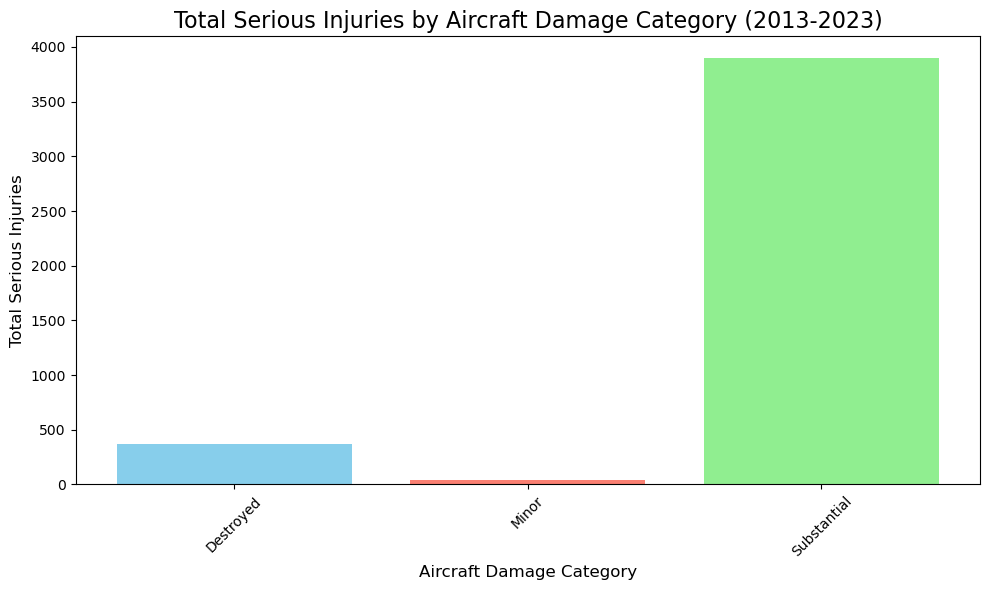

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(damage_vs_serious['Aircraft.damage'], damage_vs_serious['sum'], color=['skyblue', 'salmon', 'lightgreen'])

plt.title('Total Serious Injuries by Aircraft Damage Category (2013-2023)', fontsize=16)
plt.xlabel('Aircraft Damage Category', fontsize=12)
plt.ylabel('Total Serious Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [29]:
yearly_damage_serious = (
    filtered_df.groupby(['Year', 'Aircraft.damage'])['Total.Serious.Injuries']
    .sum()
    .reset_index()
)
print(yearly_damage_serious.head())

   Year Aircraft.damage  Total.Serious.Injuries
0  2013       Destroyed                   164.0
1  2013           Minor                    16.0
2  2013     Substantial                   444.0
3  2014       Destroyed                    13.0
4  2014           Minor                     1.0


In [30]:
pivot_yearly_damage_serious = yearly_damage_serious.pivot(
    index='Year', columns='Aircraft.damage', values='Total.Serious.Injuries'
).fillna(0)

print(pivot_yearly_damage_serious)

Aircraft.damage  Destroyed  Minor  Substantial
Year                                          
2013                 164.0   16.0        444.0
2014                  13.0    1.0        396.0
2015                  22.0    1.0        410.0
2016                  28.0    0.0        406.0
2017                  25.0    2.0        369.0
2018                  49.0    3.0        498.0
2019                  30.0    7.0        330.0
2020                  21.0    4.0        450.0
2021                  15.0    0.0        283.0
2022                   5.0    3.0        316.0


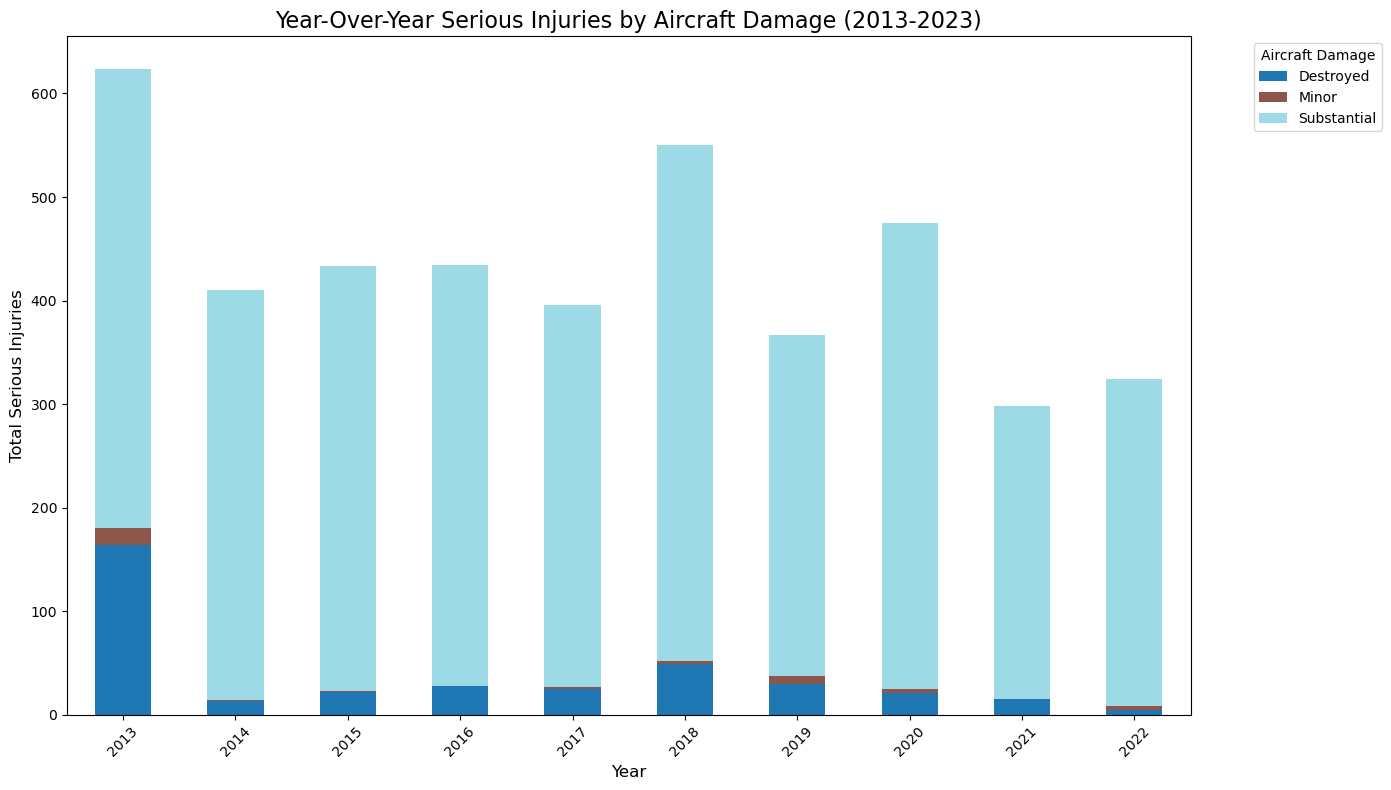

In [31]:
pivot_yearly_damage_serious.plot(kind='bar', stacked=True, figsize=(14, 8), cmap='tab20')
plt.title('Year-Over-Year Serious Injuries by Aircraft Damage (2013-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Serious Injuries', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

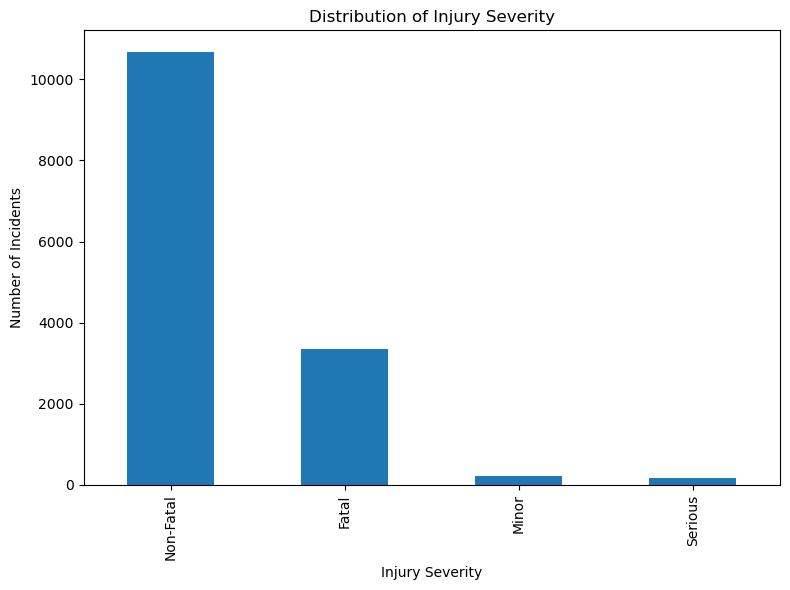

In [32]:
severity_distribution = filtered_df['Injury.Severity'].value_counts()
severity_distribution.plot(kind='bar', figsize=(8, 6), title='Distribution of Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

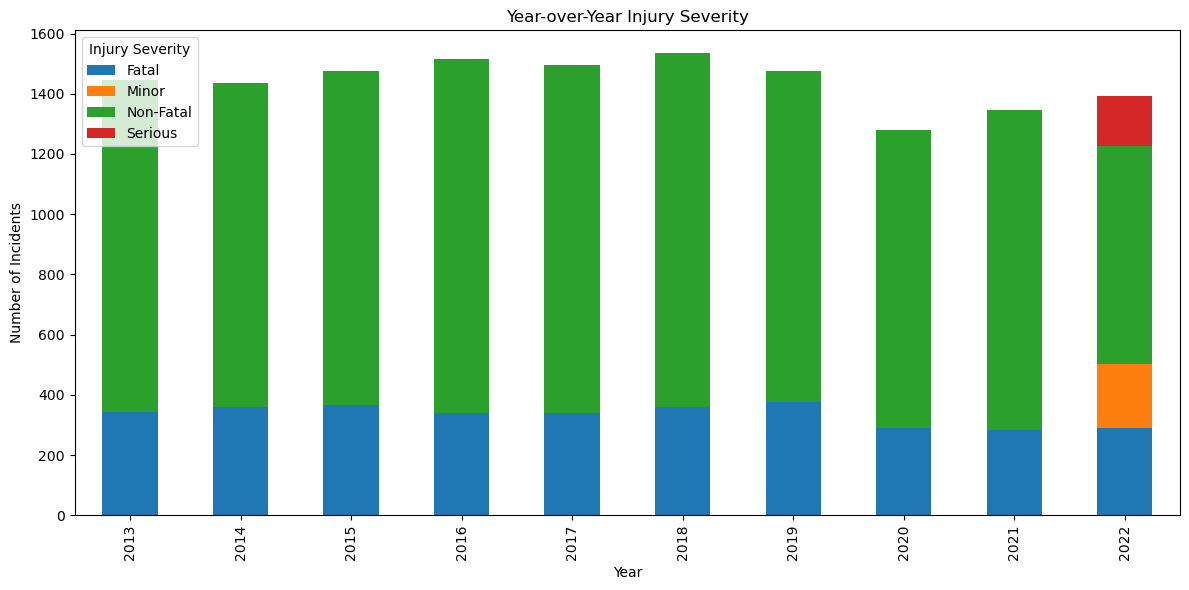

In [33]:
severity_by_year = filtered_df.groupby(['Year', 'Injury.Severity']).size().unstack(fill_value=0)
severity_by_year.plot(kind='bar', stacked=True, figsize=(12, 6), title='Year-over-Year Injury Severity')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Injury Severity')
plt.tight_layout()
plt.show()

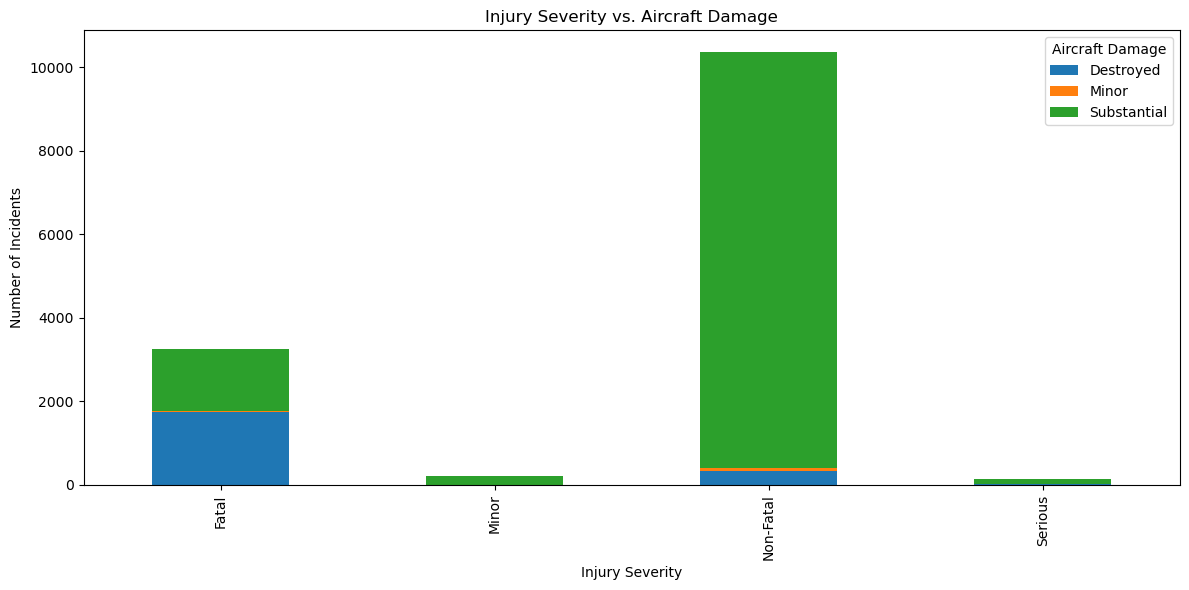

In [34]:
severity_damage = filtered_df.groupby(['Injury.Severity', 'Aircraft.damage']).size().unstack(fill_value=0)
severity_damage.plot(kind='bar', stacked=True, figsize=(12, 6), title='Injury Severity vs. Aircraft Damage')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Incidents')
plt.legend(title='Aircraft Damage')
plt.tight_layout()
plt.show()

In [35]:
severity_make = filtered_df.groupby(['Injury.Severity', 'Make']).size().reset_index(name='Count')
top_severity_make = severity_make.sort_values(by='Count', ascending=False).groupby('Injury.Severity').head(5)

print(top_severity_make)

     Injury.Severity                         Make  Count
1128       Non-Fatal                       cessna   2811
2044       Non-Fatal                        piper   1588
169            Fatal                       cessna    721
981        Non-Fatal                        beech    516
517            Fatal                        piper    479
987        Non-Fatal                         bell    279
103            Fatal                        beech    232
1028       Non-Fatal                       boeing    226
109            Fatal                         bell    126
561            Fatal                     robinson    126
735            Minor                       cessna     60
2587         Serious                       cessna     26
775            Minor                        piper     25
2620         Serious                        piper     18
2581         Serious                       boeing     10
2576         Serious                        beech      8
782            Minor  robinson 

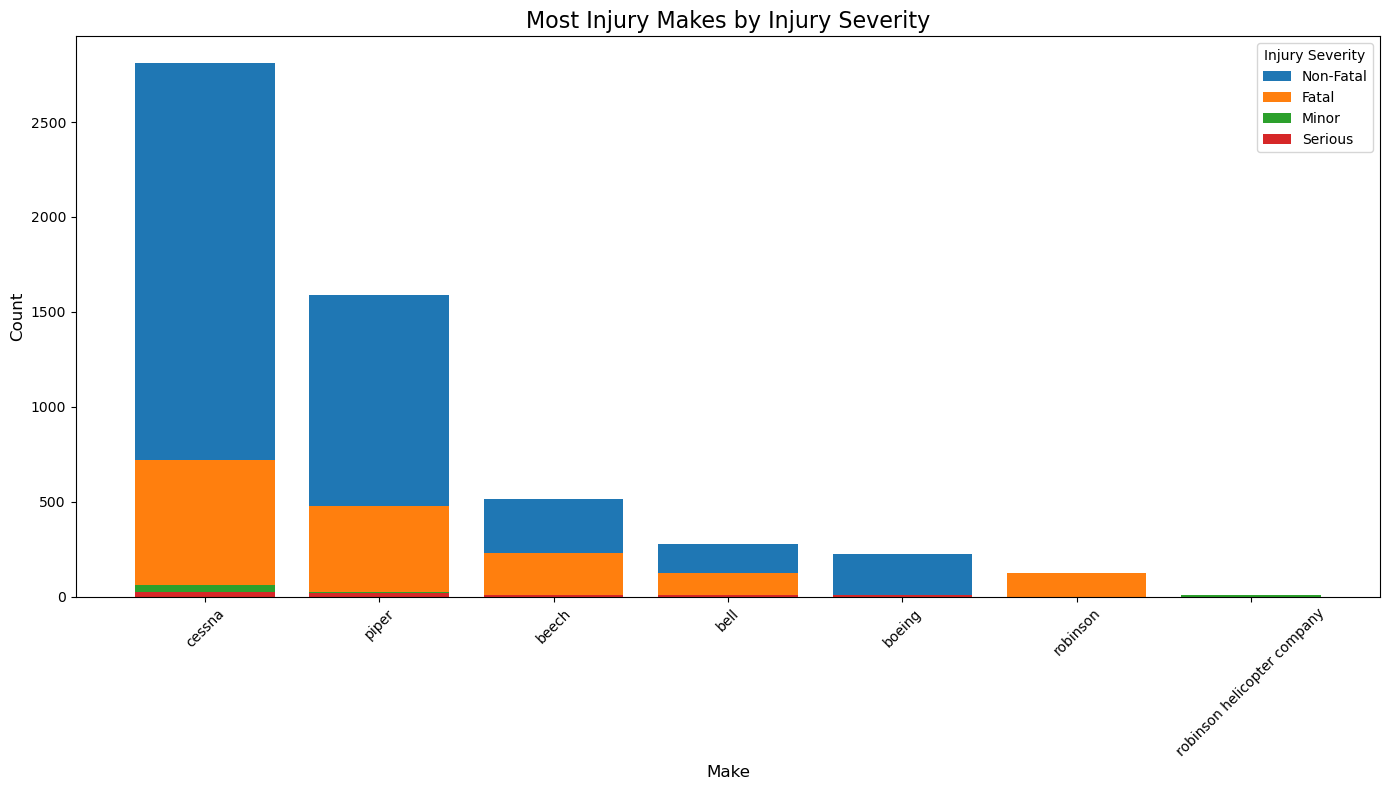

In [36]:
plt.figure(figsize=(14, 8))

for severity in top_severity_make['Injury.Severity'].unique():
    subset = top_severity_make[top_severity_make['Injury.Severity'] == severity]
    plt.bar(subset['Make'], subset['Count'], label=severity)

plt.title('Most Injury Makes by Injury Severity', fontsize=16)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.tight_layout()

plt.show()

In [37]:
make_incidents = filtered_df.groupby('Make').size().reset_index(name='Incident.Count')
print(make_incidents)

                          Make  Incident.Count
0                    177mf llc               1
1                  2021fx3 llc               2
2                       3xtrim               1
3                 5 rivers llc               1
4                   781569 inc               1
...                        ...             ...
2243                    zodiac               1
2244  zs delta-bielsko wroclaw               1
2245             zubair s khan               1
2246            zuber thomas p               1
2247          zwicker murray r               1

[2248 rows x 2 columns]


In [38]:
mean_incidents = make_incidents['Incident.Count'].mean()
median_incidents = make_incidents['Incident.Count'].median()
std_incidents = make_incidents['Incident.Count'].std()

print(f"Mean: {mean_incidents}, Median: {median_incidents}, Std Dev: {std_incidents}")

Mean: 6.405693950177936, Median: 1.0, Std Dev: 91.05900219762738


In [39]:
lower_threshold = mean_incidents - std_incidents  
upper_threshold = mean_incidents + 2 * std_incidents  

print(f"Threshold: Between {lower_threshold} and {upper_threshold}")

Threshold: Between -84.65330824744944 and 188.5236983454327


In [40]:
filtered_makes = make_incidents[
    (make_incidents['Incident.Count'] >= lower_threshold) &
    (make_incidents['Incident.Count'] <= upper_threshold)
]

print(filtered_makes)

                          Make  Incident.Count
0                    177mf llc               1
1                  2021fx3 llc               2
2                       3xtrim               1
3                 5 rivers llc               1
4                   781569 inc               1
...                        ...             ...
2243                    zodiac               1
2244  zs delta-bielsko wroclaw               1
2245             zubair s khan               1
2246            zuber thomas p               1
2247          zwicker murray r               1

[2242 rows x 2 columns]


In [41]:
filtered_df['Make'].str.strip().str.upper().value_counts().head(50)

Make
CESSNA                            3618
PIPER                             2110
BEECH                              759
BELL                               416
ROBINSON                           271
BOEING                             268
MOONEY                             184
AIR TRACTOR INC                    146
CIRRUS DESIGN CORP                 135
ROBINSON HELICOPTER                127
ROBINSON HELICOPTER COMPANY        125
VANS                               119
AIR TRACTOR                        111
AERONCA                            109
BELLANCA                           108
MAULE                              102
CHAMPION                            97
HUGHES                              96
CIRRUS                              92
AIRBUS INDUSTRIES                   85
SCHWEIZER                           82
STINSON                             75
LUSCOMBE                            70
EUROCOPTER                          64
GRUMMAN                             63
NORTH AMERICAN      

In [42]:
filtered_df['Make'] = df['Make'].str.upper().replace(r'.*\b(AIRBUS|BOEING|CESSNA|PIPER|BEECH)\b.*', r'\1', regex=True)


/var/folders/m7/tzk7gpbd05j79z_hsb25z6jm0000gn/T/ipykernel_91671/565155406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Make'] = df['Make'].str.upper().replace(r'.*\b(AIRBUS|BOEING|CESSNA|PIPER|BEECH)\b.*', r'\1', regex=True)


In [43]:
filtered_df['Make'].value_counts().head(50)

Make
CESSNA                            3665
PIPER                             2153
BEECH                              767
BELL                               416
BOEING                             274
ROBINSON                           271
MOONEY                             184
AIR TRACTOR INC                    146
CIRRUS DESIGN CORP                 135
ROBINSON HELICOPTER                127
ROBINSON HELICOPTER COMPANY        125
VANS                               119
AIR TRACTOR                        111
AERONCA                            109
BELLANCA                           108
MAULE                              102
AIRBUS                             102
CHAMPION                            97
HUGHES                              96
CIRRUS                              92
SCHWEIZER                           82
STINSON                             75
LUSCOMBE                            70
EUROCOPTER                          64
GRUMMAN                             63
NORTH AMERICAN      

In [44]:
filtered_rows = filtered_df[filtered_df['Make'].isin(['AIRBUS', 'BOEING', 'CESSNA', 'PIPER', 'BEECH'])]
(filtered_rows)

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Year,Month
70205,Accident,2013-01-01,"Chiloquin, OR",United States,Non-Fatal,Substantial,Airplane,CESSNA,182P,No,...,Instructional,0.0,0.0,0.0,2.0,VMC,NaN,The flight instructorÂs failure to maintain a...,2013,1
70206,Accident,2013-01-02,"North Las Vegas, NV",United States,Non-Fatal,Substantial,Airplane,PIPER,PA-60-602P,No,...,Instructional,0.0,0.0,0.0,2.0,VMC,NaN,The pilotÂs failure to maintain an adequate d...,2013,1
70208,Accident,2013-01-02,"Jasper, AL",United States,Fatal,Destroyed,Airplane,PIPER,PA-30,No,...,Personal,3.0,0.0,0.0,0.0,IMC,NaN,The student pilotÂs poor judgment to take a m...,2013,1
70217,Accident,2013-01-04,"Palm Coast, FL",United States,Fatal,Destroyed,Airplane,BEECH,H35,No,...,Personal,3.0,0.0,0.0,0.0,IMC,NaN,A total loss of engine power after the failure...,2013,1
70218,Accident,2013-01-04,"Palmer, AK",United States,Non-Fatal,Substantial,Airplane,PIPER,PA-18-150,No,...,Personal,0.0,0.0,0.0,1.0,VMC,NaN,The pilot's selection of unsuitable terrain fo...,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84597,Accident,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,Airplane,CESSNA,R172K,No,...,Personal,0.0,1.0,1.0,0.0,VMC,NaN,NaN,2022,12
84599,Accident,2022-12-18,"San Manual, AZ",United States,Non-Fatal,NaN,NaN,PIPER,PA28,No,...,Personal,0.0,0.0,0.0,3.0,NaN,NaN,NaN,2022,12
84600,Accident,2022-12-21,"Auburn Hills, MI",United States,Minor,NaN,NaN,CESSNA,172F,No,...,Personal,0.0,1.0,1.0,0.0,NaN,NaN,NaN,2022,12
84603,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,PIPER,PA-28-151,No,...,Personal,0.0,1.0,1.0,0.0,NaN,NaN,NaN,2022,12


Cessna Dive

In [45]:
cessna_df = filtered_df[filtered_df['Make'] == 'CESSNA']
print(cessna_df)

      Investigation.Type Event.Date          Location        Country  \
70205           Accident 2013-01-01     Chiloquin, OR  United States   
70221           Accident 2013-01-05      Skwentna, AK  United States   
70233           Accident 2013-01-11       Brandon, FL  United States   
70244           Accident 2013-01-16      Pellston, MI  United States   
70251           Accident 2013-01-18       Redmond, OR  United States   
...                  ...        ...               ...            ...   
84584           Accident 2022-12-10     Alabaster, AL  United States   
84586           Accident 2022-12-12     Knoxville, TN  United States   
84592           Accident 2022-12-13       Liberal, KS  United States   
84597           Accident 2022-12-16   Brooksville, FL  United States   
84600           Accident 2022-12-21  Auburn Hills, MI  United States   

      Injury.Severity Aircraft.damage Aircraft.Category    Make  Model  \
70205       Non-Fatal     Substantial          Airplane  CESS

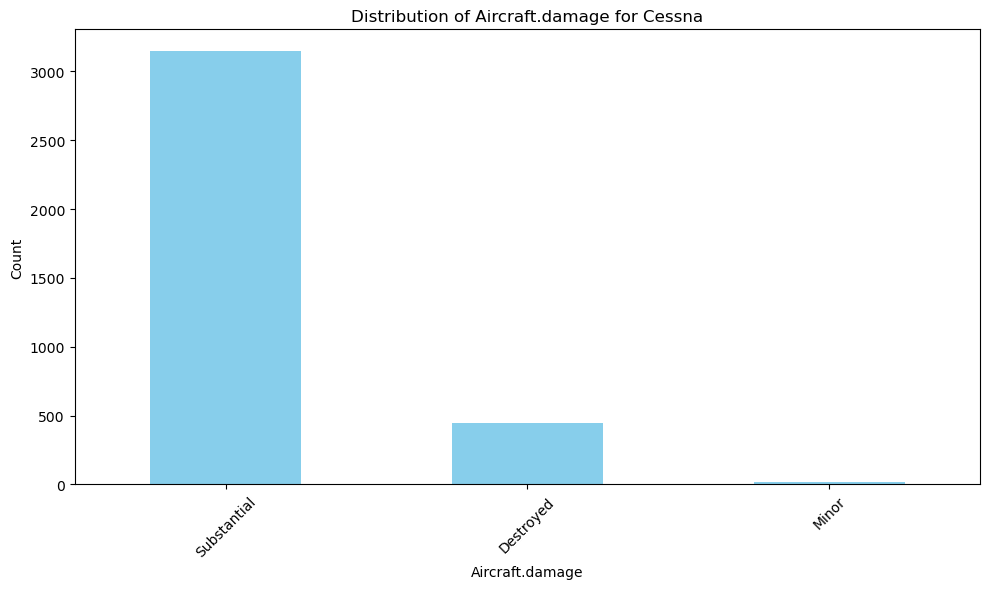

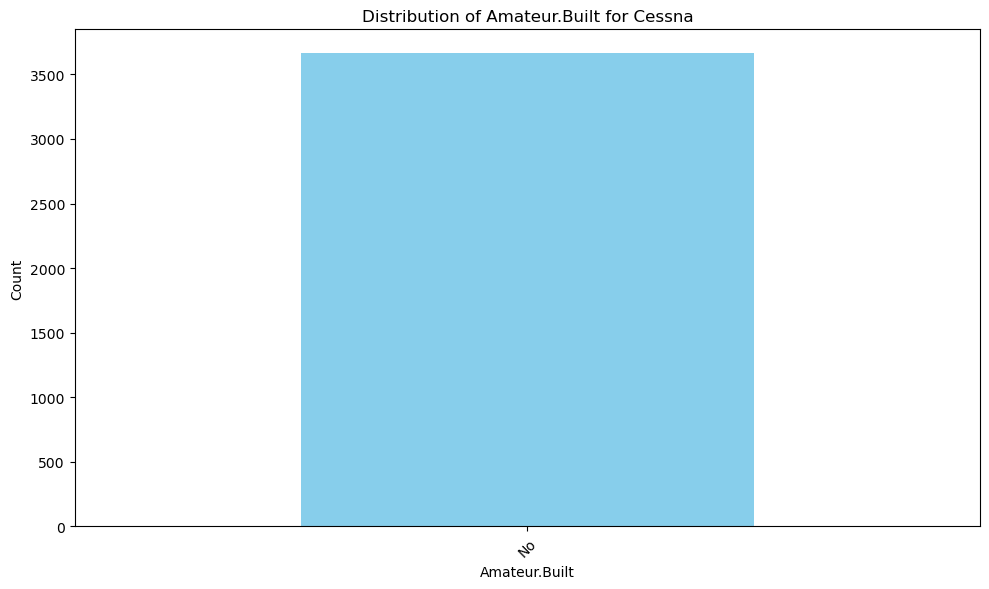

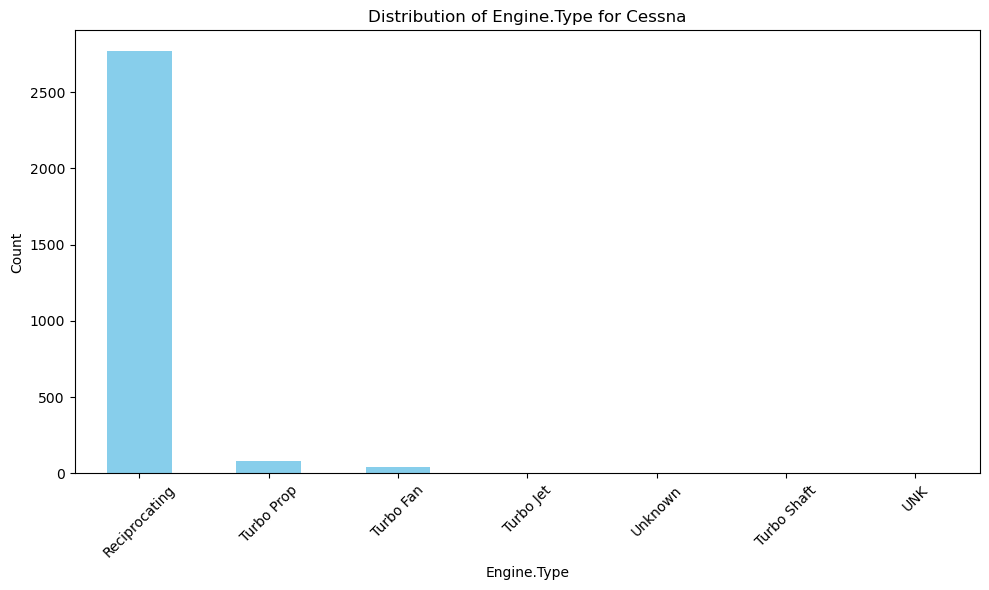

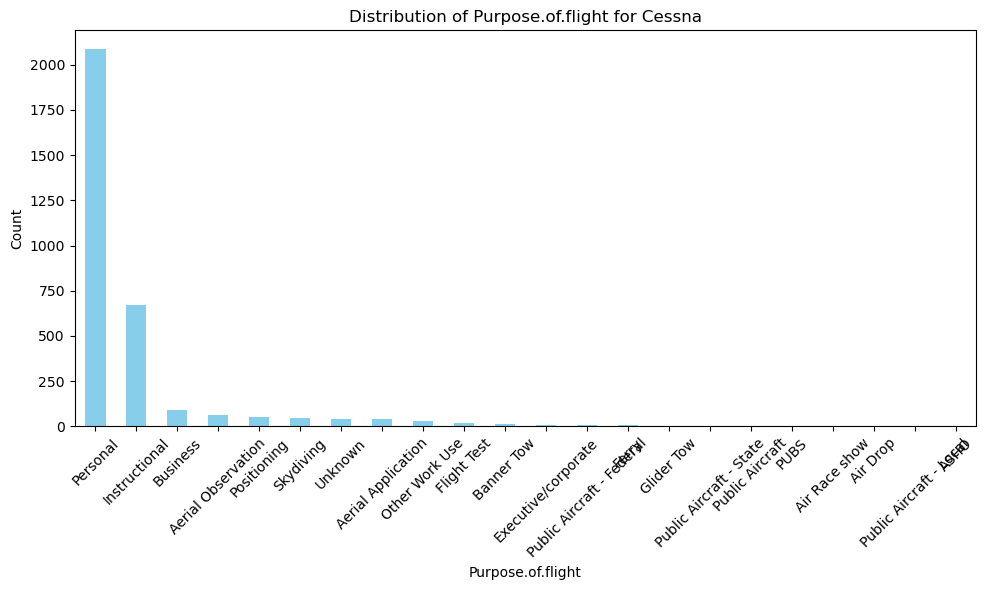

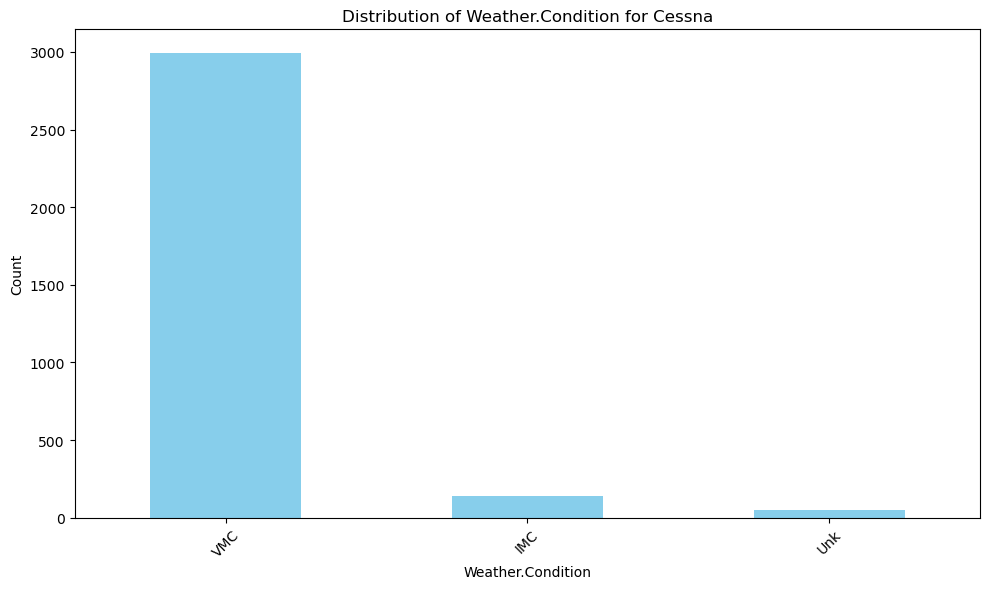

In [46]:
qualitative_columns = [
    'Aircraft.damage',
    'Amateur.Built', 'Engine.Type', 'Purpose.of.flight',
    'Weather.Condition'
]

for col in qualitative_columns:
    plt.figure(figsize=(10, 6))
    cessna_df[col].value_counts().plot(kind='bar', color='skyblue', title=f'Distribution of {col} for Cessna')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [47]:
quantitative_columns = [
    'Number.of.Engines',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Uninjured'
]

print(cessna_df[quantitative_columns].describe())

       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count        3665.000000           3665.000000             3665.000000   
mean            1.097681              0.400273                0.261664   
std             0.305977              1.023176                0.705574   
min             1.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             4.000000             14.000000                9.000000   

       Total.Uninjured  
count      3665.000000  
mean          1.193179  
std           1.458227  
min           0.000000  
25%           0.000000  
50%           1.000000  
75%           2.000000  
max          18.000000  


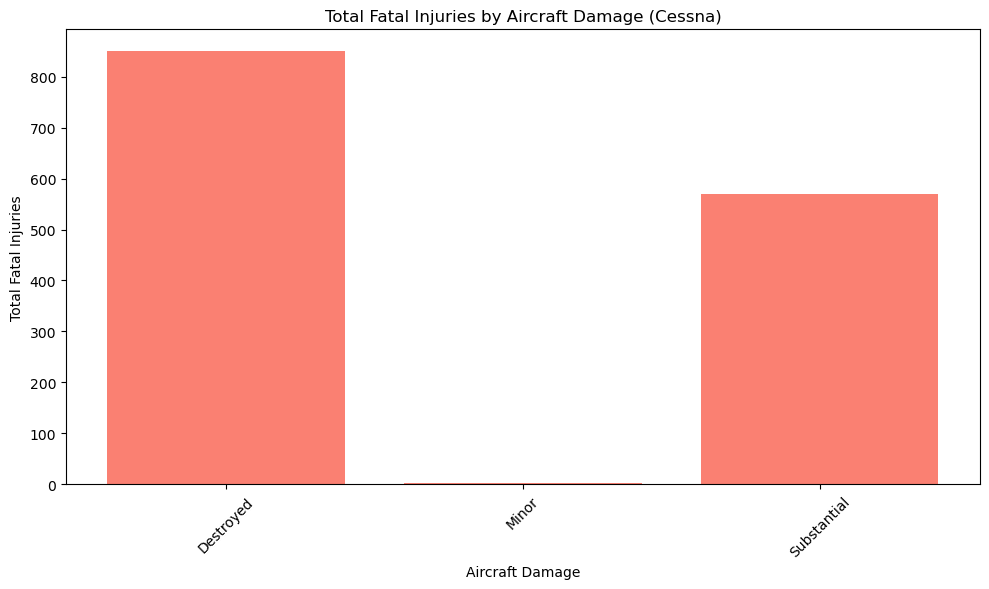

In [48]:
damage_fatalities = cessna_df.groupby('Aircraft.damage')['Total.Fatal.Injuries'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(damage_fatalities['Aircraft.damage'], damage_fatalities['Total.Fatal.Injuries'], color='salmon')
plt.title('Total Fatal Injuries by Aircraft Damage (Cessna)')
plt.xlabel('Aircraft Damage')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

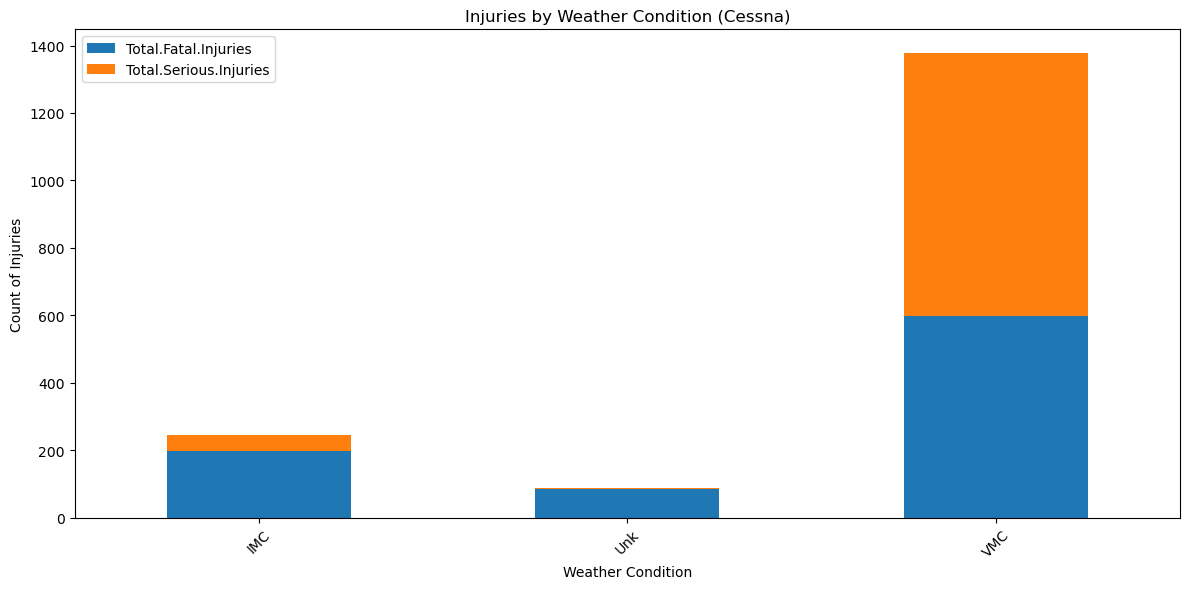

In [49]:
weather_injuries = cessna_df.groupby('Weather.Condition')[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum().reset_index()

weather_injuries.set_index('Weather.Condition').plot(kind='bar', stacked=True, figsize=(12, 6), title='Injuries by Weather Condition (Cessna)')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

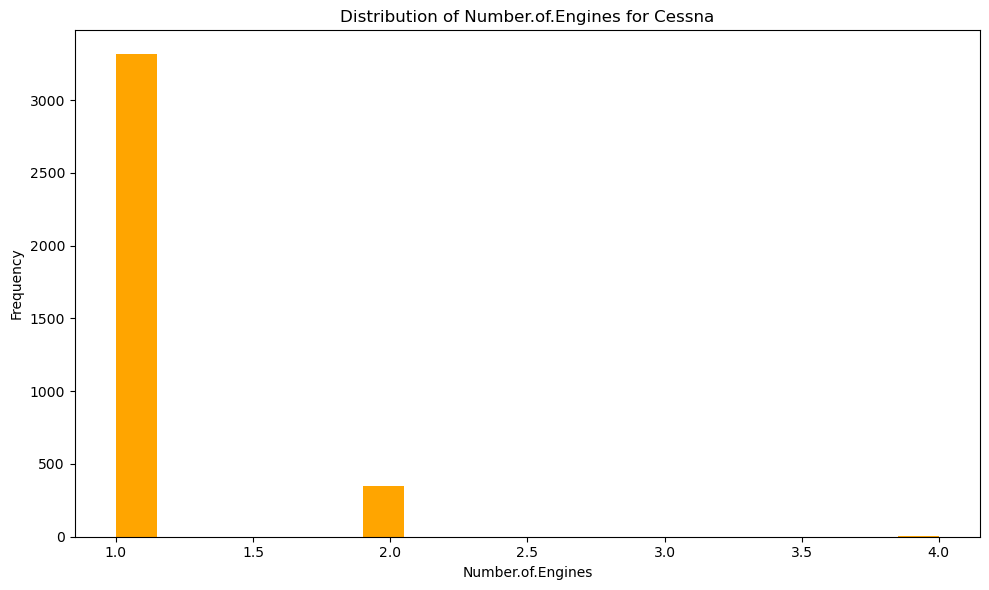

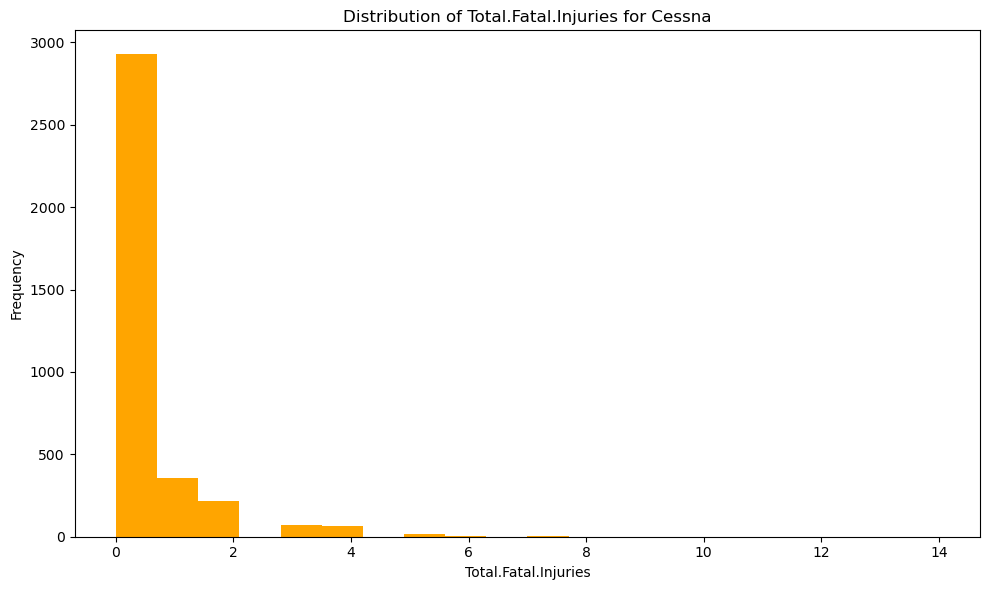

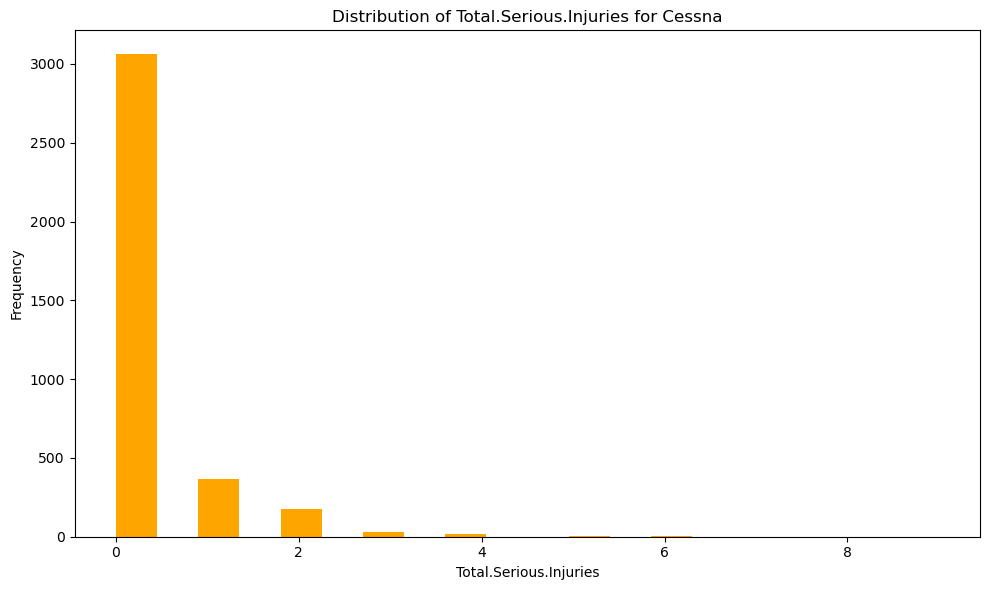

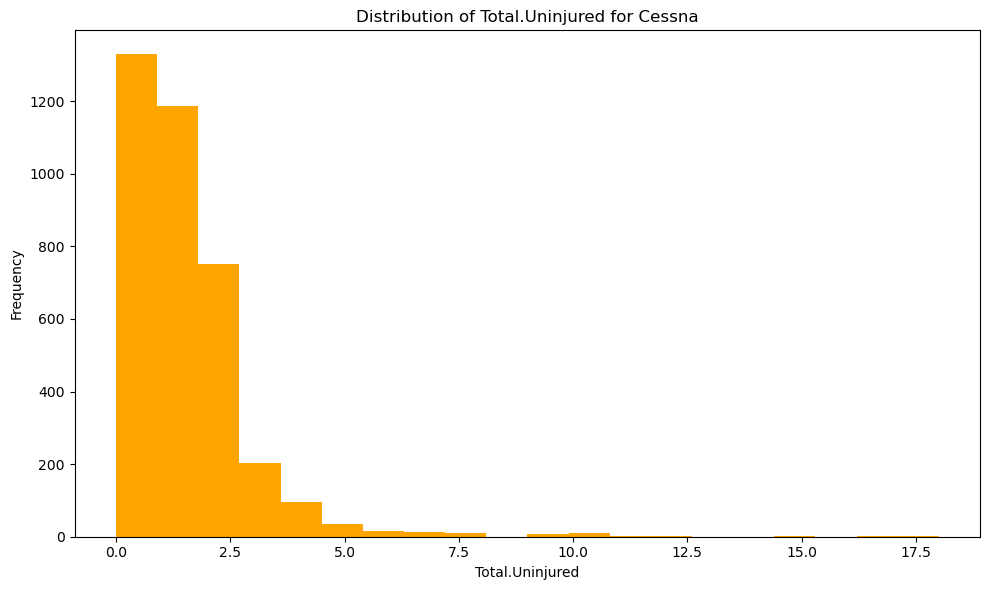

In [50]:
for col in quantitative_columns:
    plt.figure(figsize=(10, 6))
    
    cessna_data = pd.to_numeric(cessna_df[col], errors='coerce').dropna()
    
    # Plot the histogram if data is not empty
    if not cessna_data.empty:
        cessna_data.plot(kind='hist', bins=20, color='orange', title=f'Distribution of {col} for Cessna')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid numeric data for {col}")


In [51]:
cessna_means = cessna_df[quantitative_columns].mean()
cessna_sum = cessna_df[quantitative_columns].sum()
print(cessna_means)
print(cessna_sum)

Number.of.Engines         1.097681
Total.Fatal.Injuries      0.400273
Total.Serious.Injuries    0.261664
Total.Uninjured           1.193179
dtype: float64
Number.of.Engines         4023.0
Total.Fatal.Injuries      1467.0
Total.Serious.Injuries     959.0
Total.Uninjured           4373.0
dtype: float64


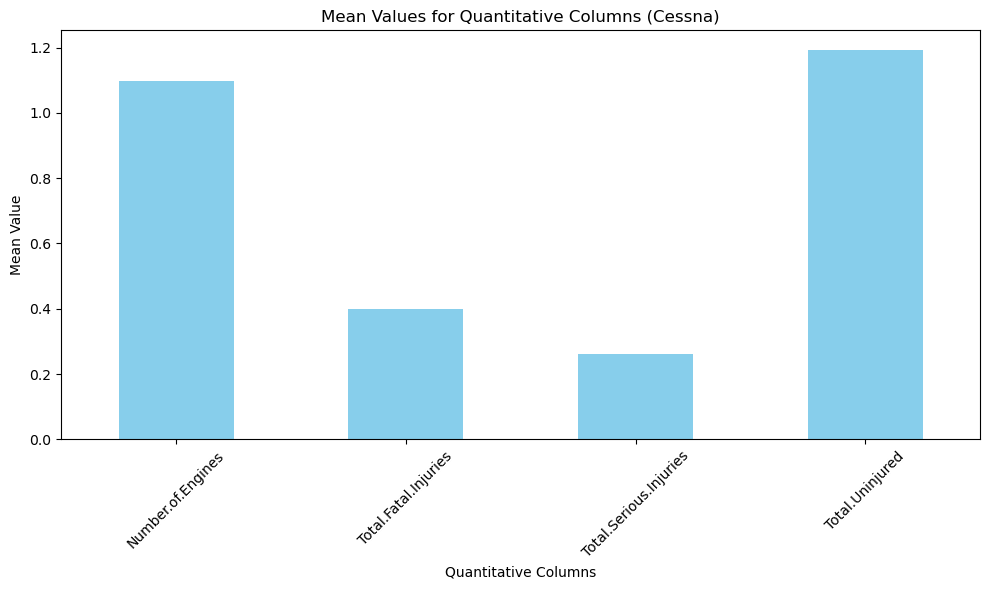

In [52]:
cessna_means.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Mean Values for Quantitative Columns (Cessna)')
plt.ylabel('Mean Value')
plt.xlabel('Quantitative Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
cessna_injuries_by_engine = (
    cessna_df.groupby(['Year', 'Engine.Type', 'Number.of.Engines'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']]
    .sum()
    .reset_index()
)

print(cessna_injuries_by_engine)

    Year    Engine.Type  Number.of.Engines  Total.Fatal.Injuries  \
0   2013  Reciprocating                1.0                  55.0   
1   2013  Reciprocating                2.0                  25.0   
2   2013      Turbo Fan                2.0                   6.0   
3   2013     Turbo Prop                1.0                  11.0   
4   2013     Turbo Prop                2.0                   1.0   
5   2013        Unknown                1.0                   5.0   
6   2014  Reciprocating                1.0                  93.0   
7   2014  Reciprocating                2.0                  14.0   
8   2014      Turbo Fan                2.0                   7.0   
9   2014     Turbo Prop                1.0                   2.0   
10  2015  Reciprocating                1.0                  81.0   
11  2015  Reciprocating                2.0                  19.0   
12  2015      Turbo Fan                1.0                   4.0   
13  2015      Turbo Fan                2.0      

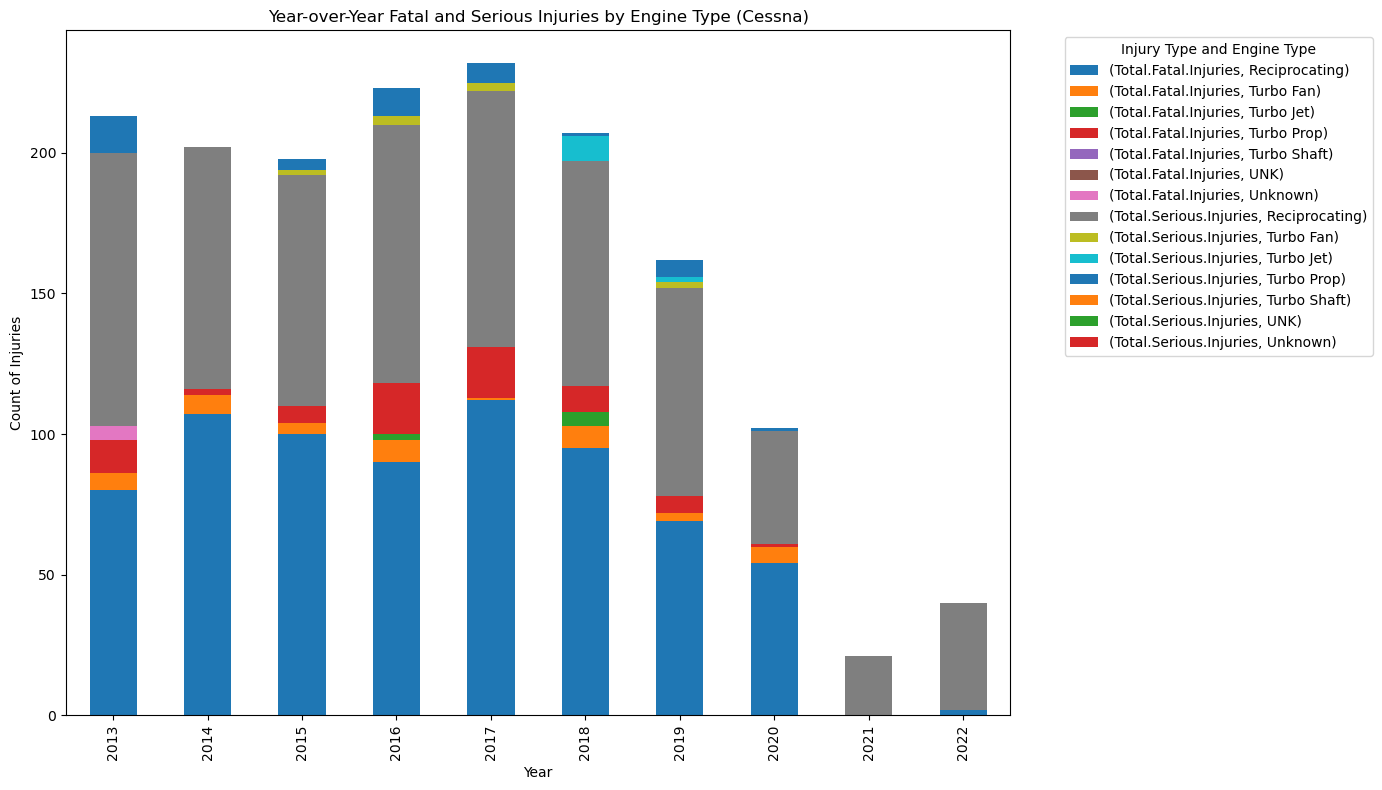

In [54]:
pivot_engine_injuries = cessna_injuries_by_engine.pivot_table(
    values=['Total.Fatal.Injuries', 'Total.Serious.Injuries'],
    index='Year',
    columns='Engine.Type',
    aggfunc='sum',
    fill_value=0
)

pivot_engine_injuries.plot(kind='bar', stacked=True, figsize=(14, 8), title='Year-over-Year Fatal and Serious Injuries by Engine Type (Cessna)')
plt.xlabel('Year')
plt.ylabel('Count of Injuries')
plt.legend(title='Injury Type and Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [55]:
cessna_injuries = (
    cessna_df.groupby(['Year', 'Engine.Type', 'Number.of.Engines'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']]
    .sum()
    .reset_index()
)

print(cessna_injuries.head())

   Year    Engine.Type  Number.of.Engines  Total.Fatal.Injuries  \
0  2013  Reciprocating                1.0                  55.0   
1  2013  Reciprocating                2.0                  25.0   
2  2013      Turbo Fan                2.0                   6.0   
3  2013     Turbo Prop                1.0                  11.0   
4  2013     Turbo Prop                2.0                   1.0   

   Total.Serious.Injuries  
0                    92.0  
1                     5.0  
2                     0.0  
3                    13.0  
4                     0.0  


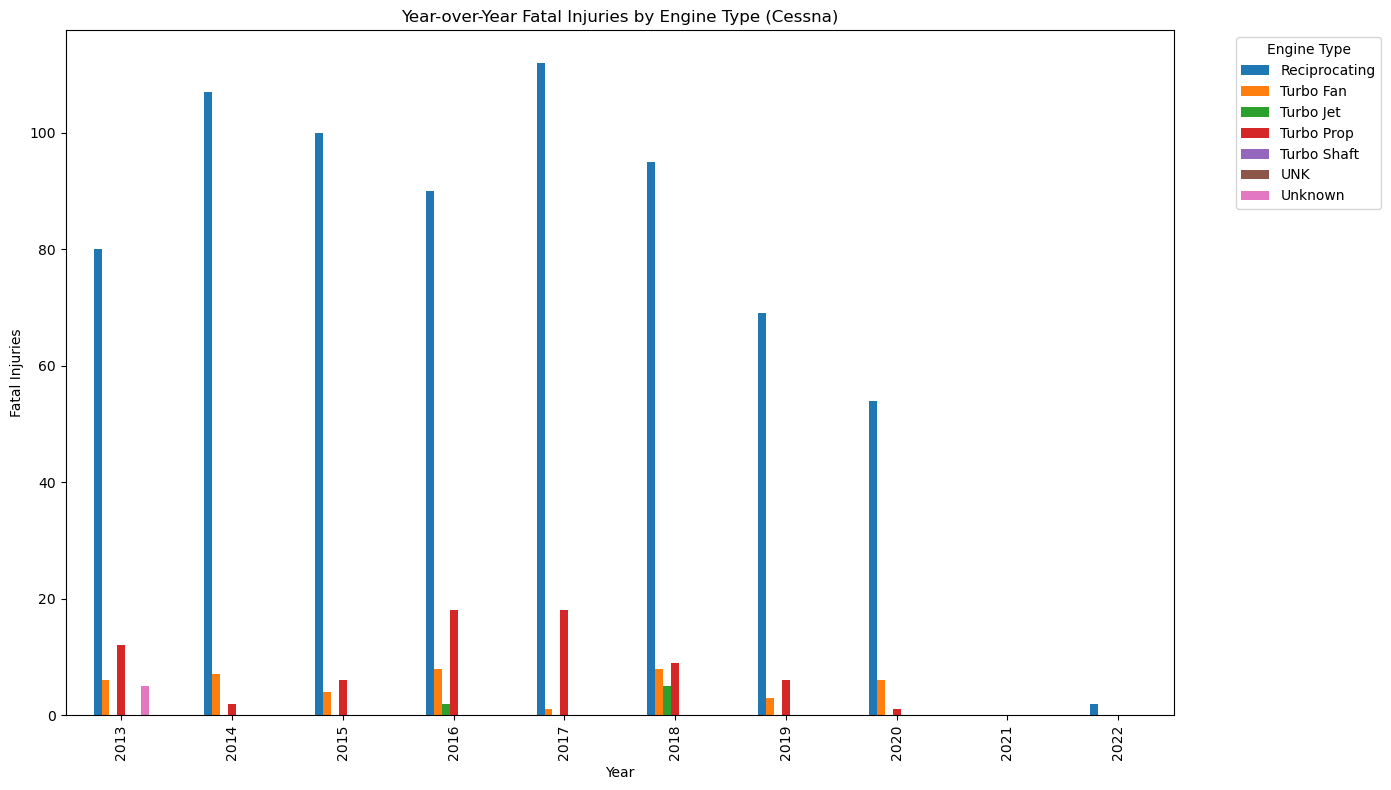

In [56]:
fatal_injuries_by_engine = cessna_injuries.pivot_table(
    values='Total.Fatal.Injuries',
    index='Year',
    columns='Engine.Type',
    aggfunc='sum',
    fill_value=0
)

fatal_injuries_by_engine.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Fatal Injuries by Engine Type (Cessna)')
plt.xlabel('Year')
plt.ylabel('Fatal Injuries')
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

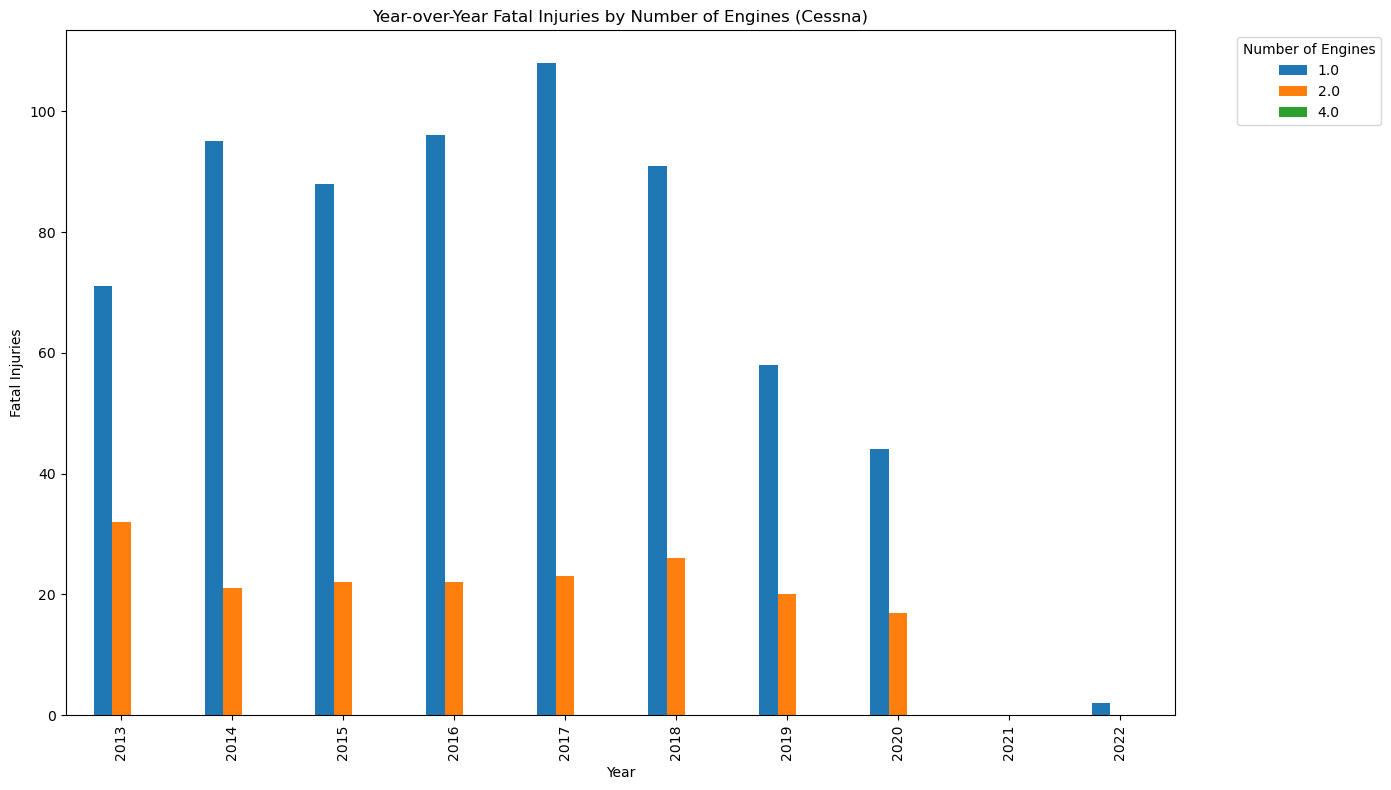

In [57]:
fatal_injuries_by_num_engines = cessna_injuries.pivot_table(
    values='Total.Fatal.Injuries',
    index='Year',
    columns='Number.of.Engines',
    aggfunc='sum',
    fill_value=0
)

fatal_injuries_by_num_engines.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Fatal Injuries by Number of Engines (Cessna)')
plt.xlabel('Year')
plt.ylabel('Fatal Injuries')
plt.legend(title='Number of Engines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

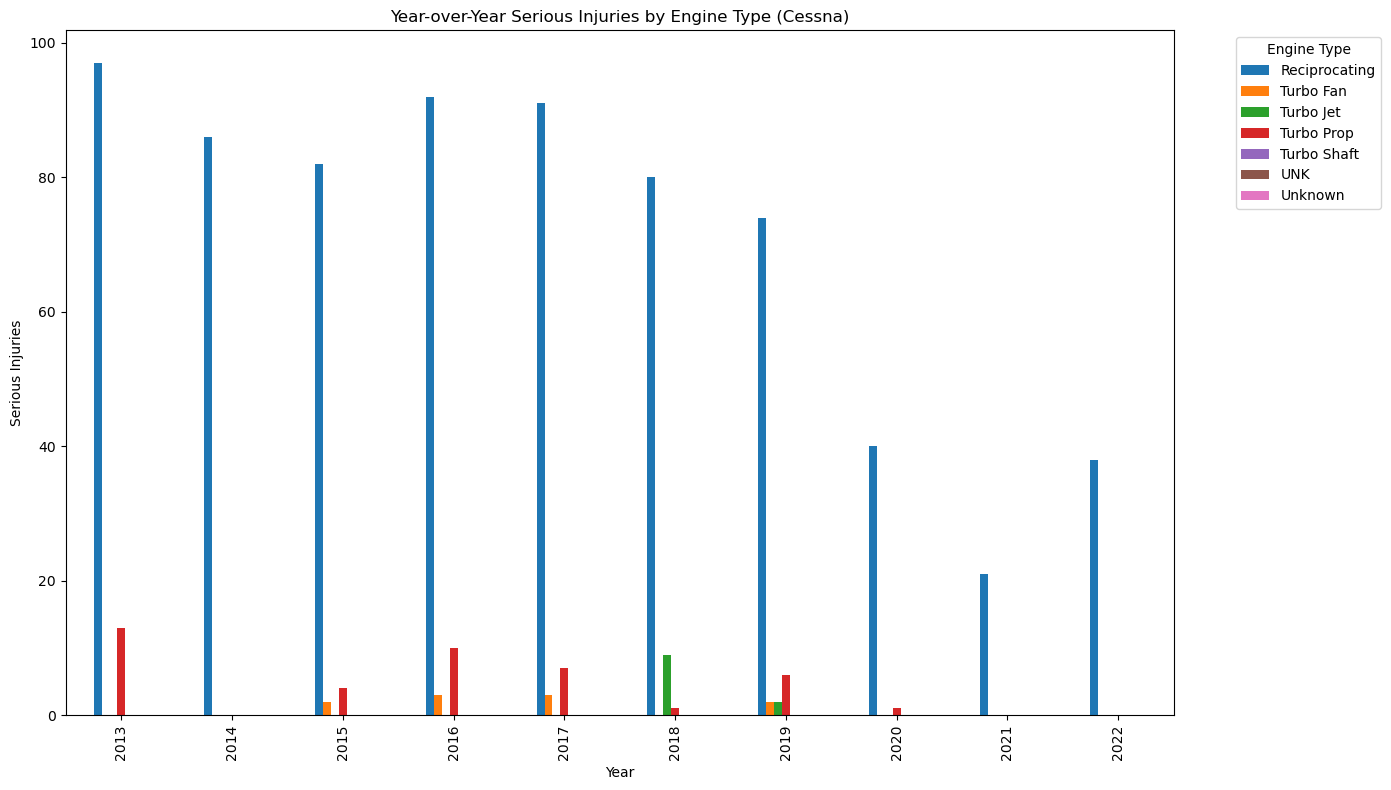

In [58]:
serious_injuries_by_engine = cessna_injuries.pivot_table(
    values='Total.Serious.Injuries',
    index='Year',
    columns='Engine.Type',
    aggfunc='sum',
    fill_value=0
)

serious_injuries_by_engine.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Serious Injuries by Engine Type (Cessna)')
plt.xlabel('Year')
plt.ylabel('Serious Injuries')
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

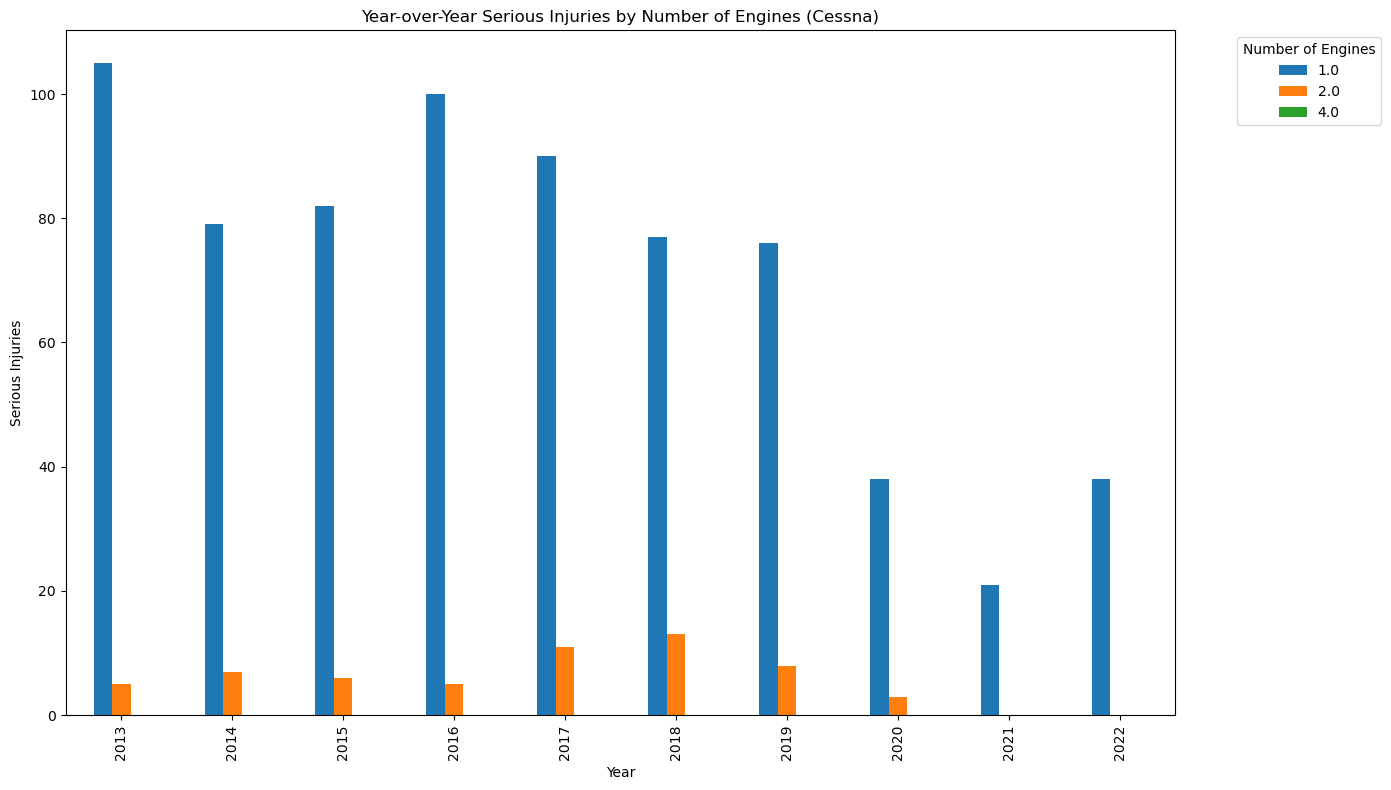

In [59]:
serious_injuries_by_num_engines = cessna_injuries.pivot_table(
    values='Total.Serious.Injuries',
    index='Year',
    columns='Number.of.Engines',
    aggfunc='sum',
    fill_value=0
)

serious_injuries_by_num_engines.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Serious Injuries by Number of Engines (Cessna)')
plt.xlabel('Year')
plt.ylabel('Serious Injuries')
plt.legend(title='Number of Engines', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [60]:
boeing_df = filtered_df[filtered_df['Make'] == 'BOEING']
print(boeing_df)

      Investigation.Type Event.Date              Location        Country  \
70223           Accident 2013-01-07  Pucallpa, Peru, Peru           Peru   
70315           Accident 2013-02-11     Muscat, Mauritius      Mauritius   
70349           Accident 2013-02-19     Pacific Ocean, UN             UN   
70395           Accident 2013-03-08           Atlanta, GA  United States   
70443           Accident 2013-03-19              Mesa, AZ  United States   
...                  ...        ...                   ...            ...   
84434           Accident 2022-10-15          Petaluma, CA  United States   
84472           Accident 2022-10-26        Long Beach, CA  United States   
84509           Accident 2022-11-10             Miami, FL  United States   
84514           Accident 2022-11-12            Dallas, TX  United States   
84578           Accident 2022-12-08            Newark, NJ  United States   

      Injury.Severity Aircraft.damage Aircraft.Category    Make        Model  \
70223  

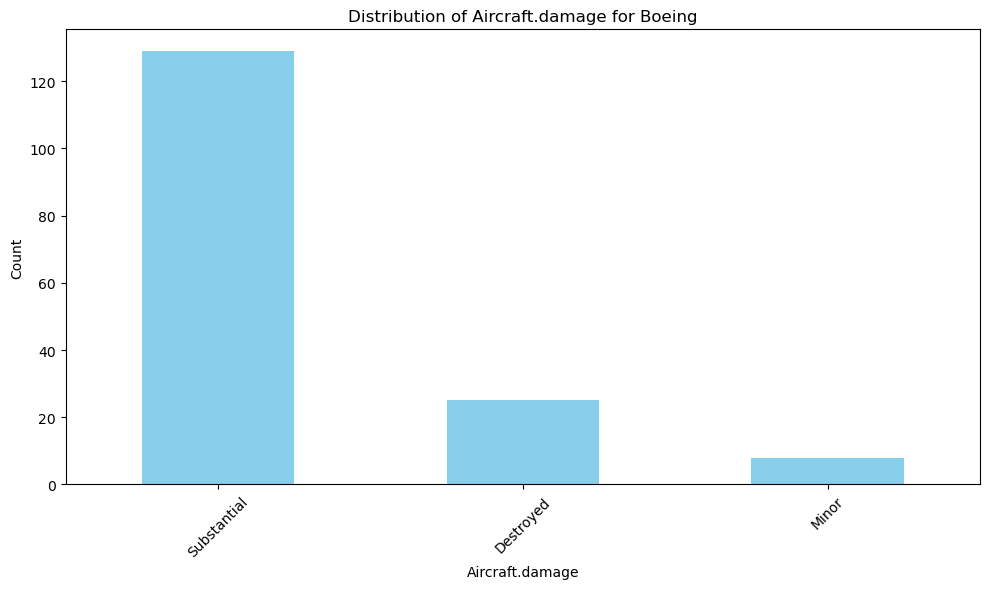

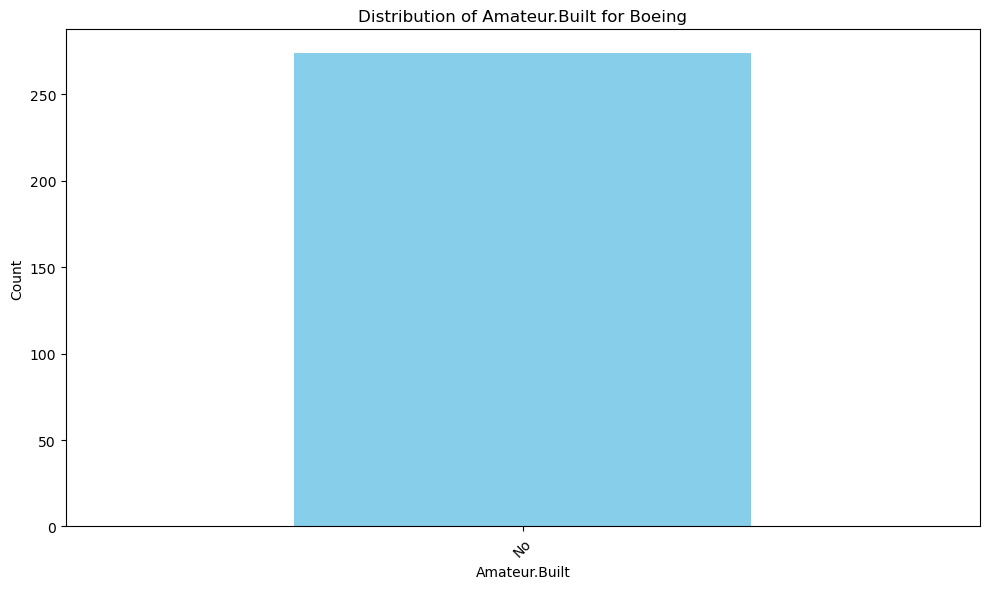

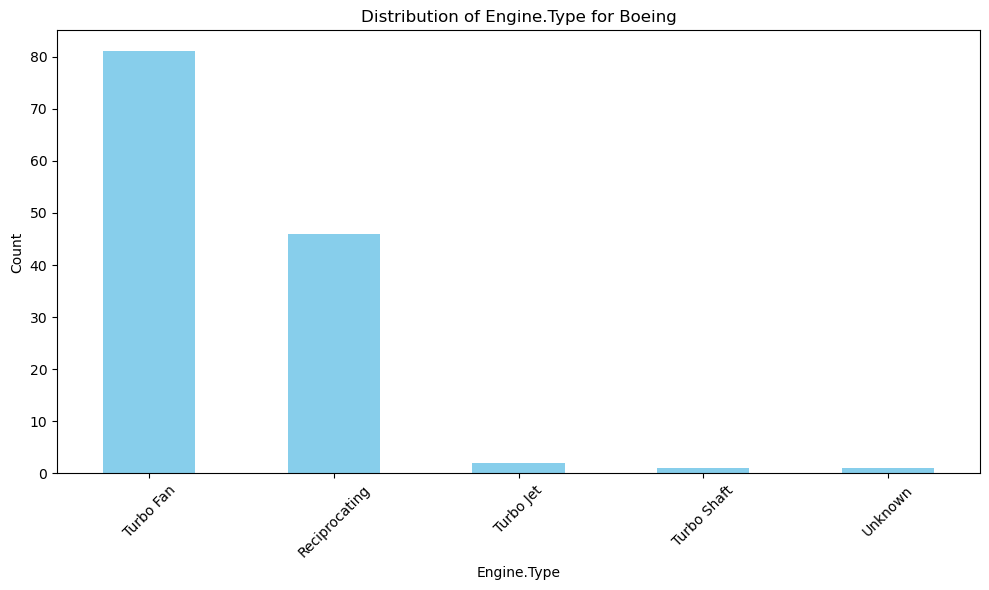

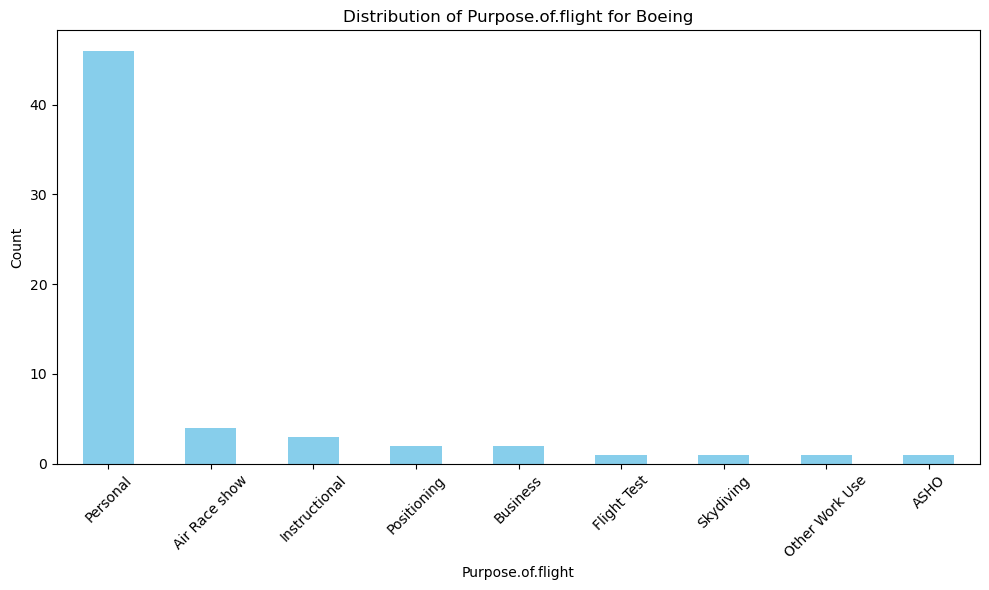

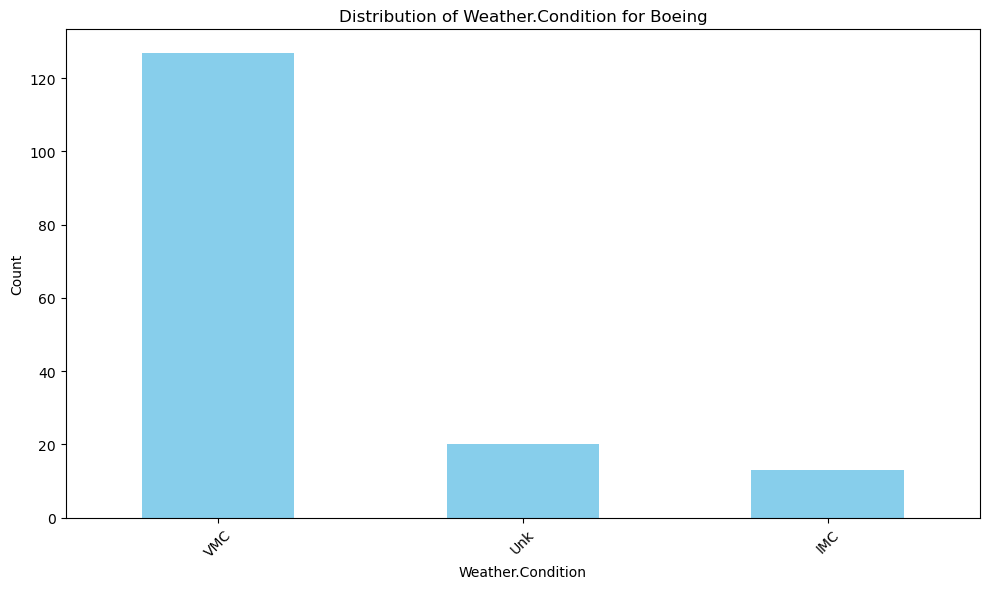

In [61]:
qualitative_columns = [
    'Aircraft.damage',
    'Amateur.Built', 'Engine.Type', 'Purpose.of.flight',
    'Weather.Condition'
]

for col in qualitative_columns:
    plt.figure(figsize=(10, 6))
    boeing_df[col].value_counts().plot(kind='bar', color='skyblue', title=f'Distribution of {col} for Boeing')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [62]:
quantitative_columns = [
    'Number.of.Engines',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Uninjured'
]

print(boeing_df[quantitative_columns].describe())

       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count         274.000000            274.000000              274.000000   
mean            1.562044              5.591241                2.536496   
std             0.638924             31.273356               15.004778   
min             1.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             2.000000              0.000000                0.000000   
75%             2.000000              0.000000                0.000000   
max             4.000000            295.000000              161.000000   

       Total.Uninjured  
count       274.000000  
mean         92.948905  
std          90.194403  
min           0.000000  
25%           2.000000  
50%         102.000000  
75%         162.000000  
max         406.000000  


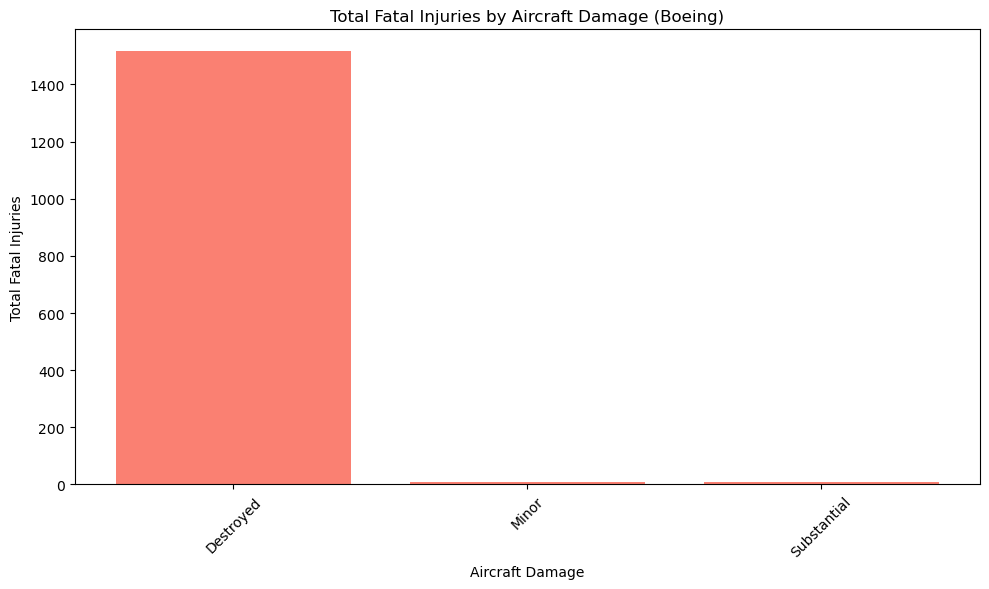

In [63]:
damage_fatalities = boeing_df.groupby('Aircraft.damage')['Total.Fatal.Injuries'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(damage_fatalities['Aircraft.damage'], damage_fatalities['Total.Fatal.Injuries'], color='salmon')
plt.title('Total Fatal Injuries by Aircraft Damage (Boeing)')
plt.xlabel('Aircraft Damage')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

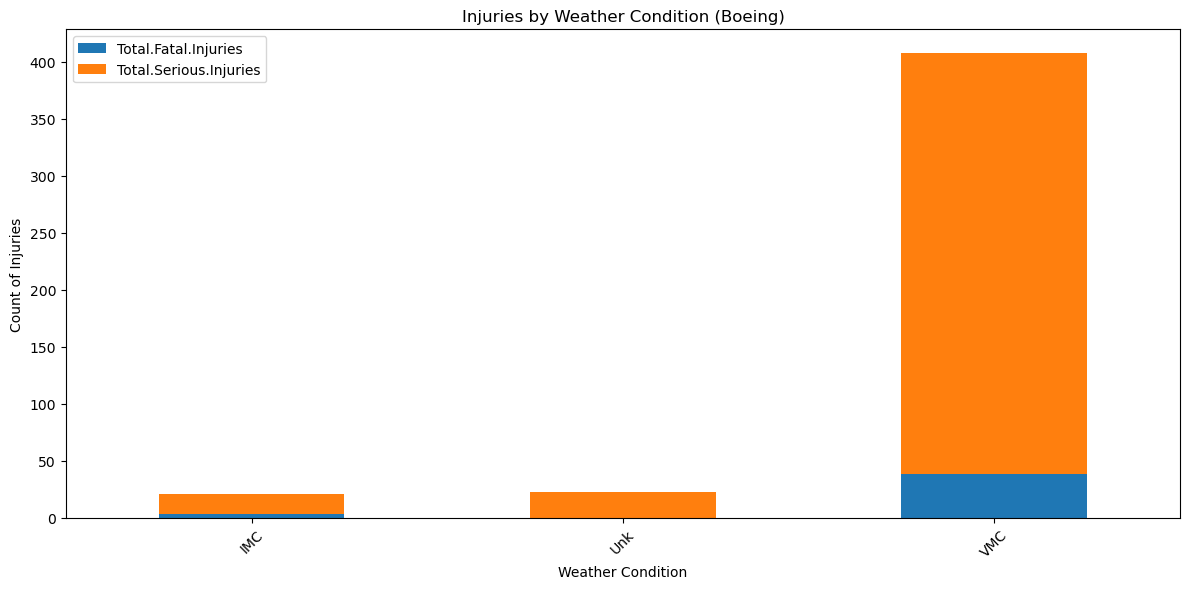

In [64]:
weather_injuries = boeing_df.groupby('Weather.Condition')[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum().reset_index()

weather_injuries.set_index('Weather.Condition').plot(kind='bar', stacked=True, figsize=(12, 6), title='Injuries by Weather Condition (Boeing)')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

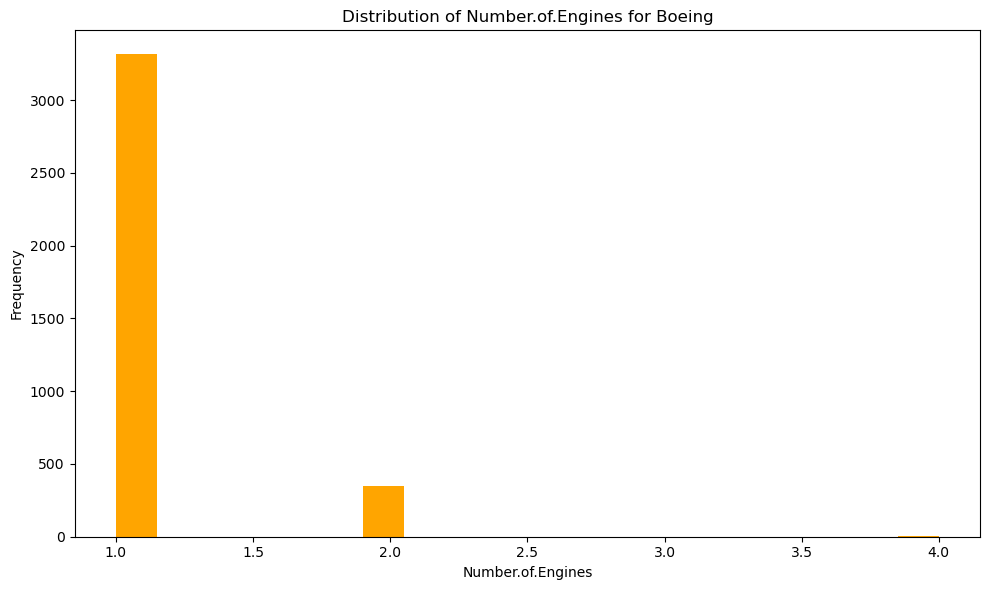

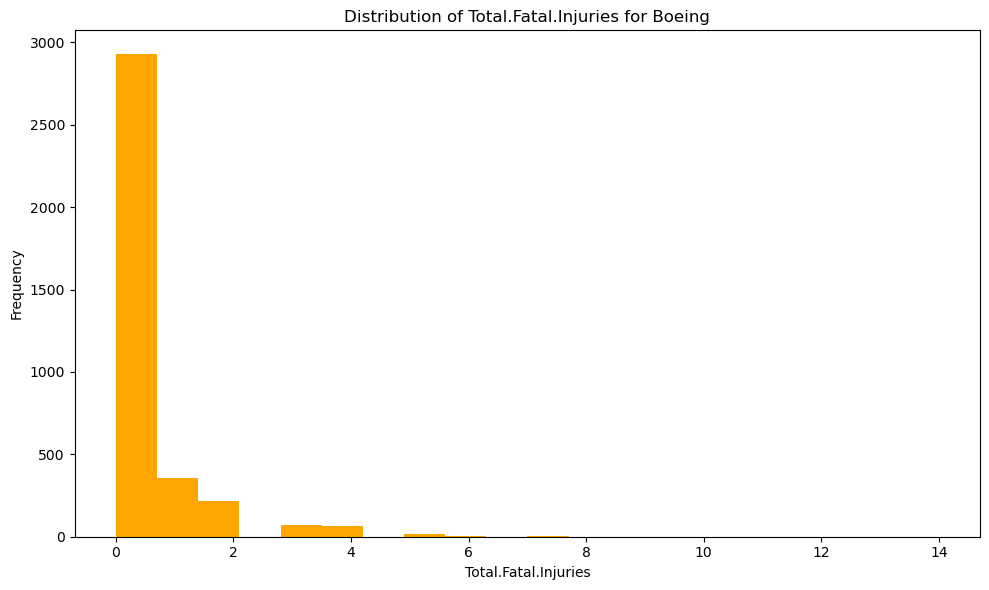

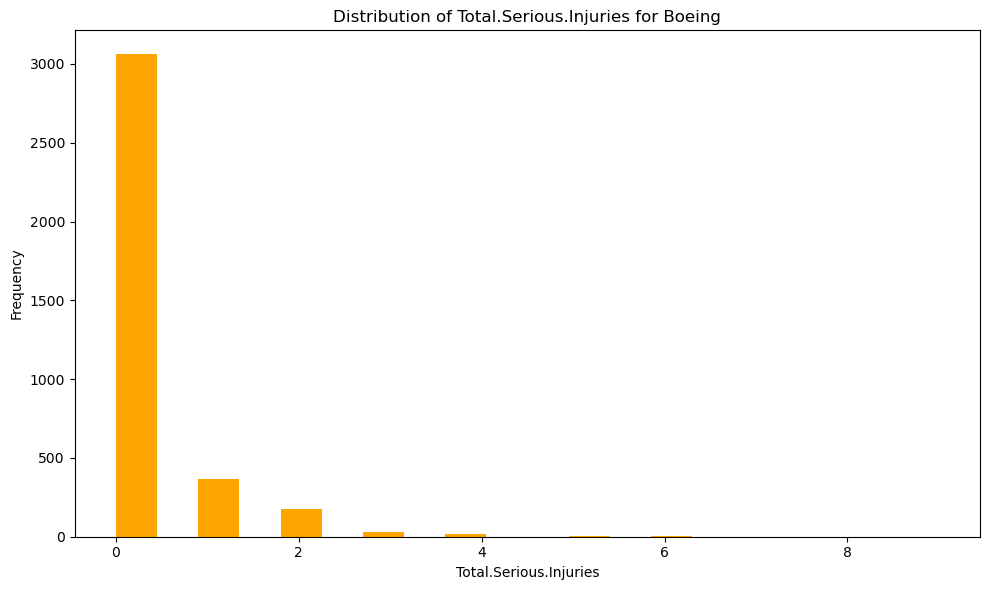

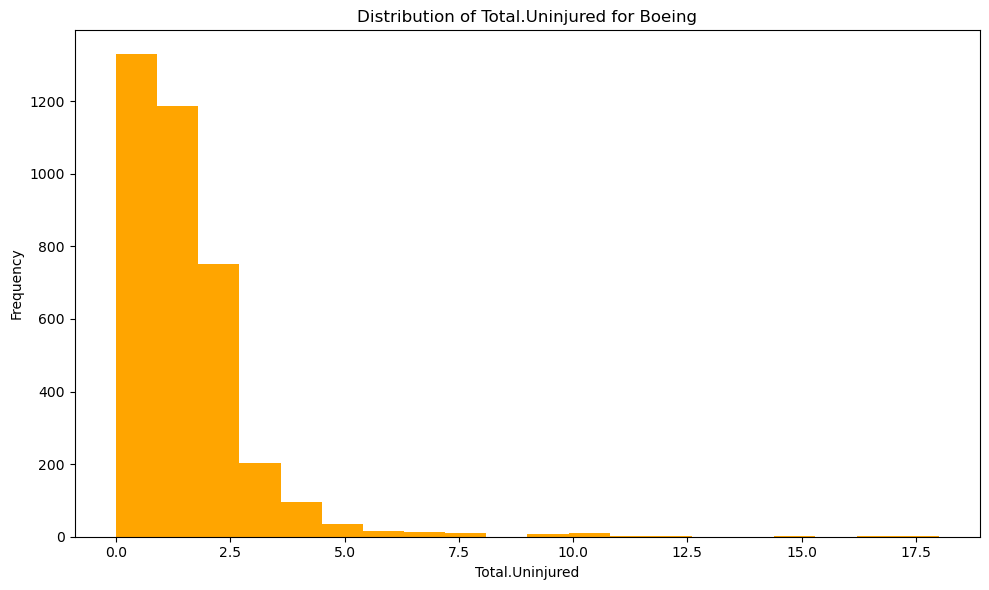

In [65]:
for col in quantitative_columns:
    plt.figure(figsize=(10, 6))
    
    boeing_data = pd.to_numeric(cessna_df[col], errors='coerce').dropna()
    
    if not boeing_data.empty:
        boeing_data.plot(kind='hist', bins=20, color='orange', title=f'Distribution of {col} for Boeing')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No valid numeric data for {col}")

In [66]:
boeing_means = boeing_df[quantitative_columns].mean()
boeing_sum = boeing_df[quantitative_columns].sum()
print(boeing_means)
print(boeing_sum)

Number.of.Engines          1.562044
Total.Fatal.Injuries       5.591241
Total.Serious.Injuries     2.536496
Total.Uninjured           92.948905
dtype: float64
Number.of.Engines           428.0
Total.Fatal.Injuries       1532.0
Total.Serious.Injuries      695.0
Total.Uninjured           25468.0
dtype: float64


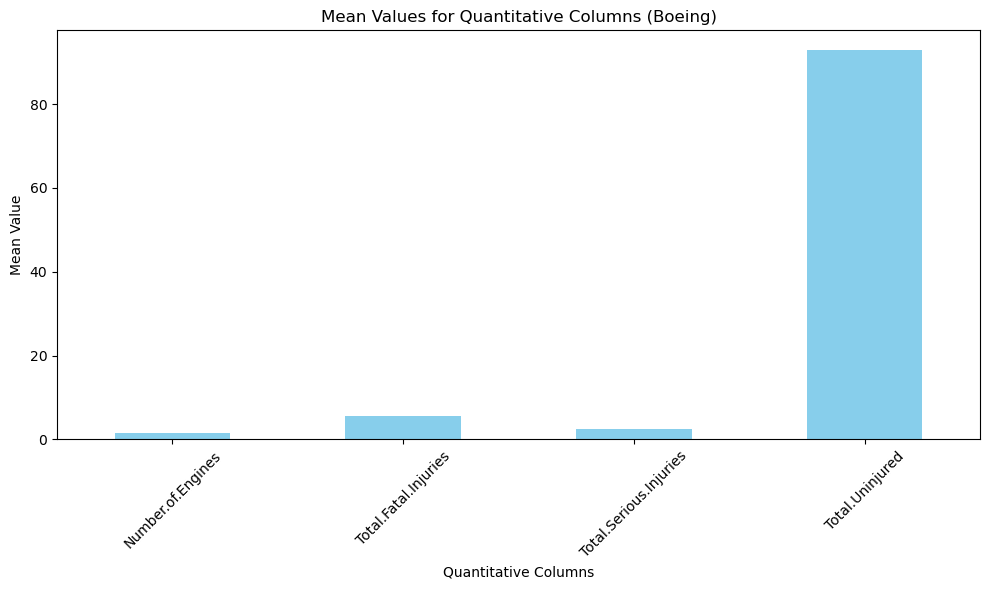

In [67]:
boeing_means.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Mean Values for Quantitative Columns (Boeing)')
plt.ylabel('Mean Value')
plt.xlabel('Quantitative Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [68]:
boeing_injuries_by_engine = (
    boeing_df.groupby(['Year', 'Engine.Type', 'Number.of.Engines'])[['Total.Fatal.Injuries', 'Total.Serious.Injuries']]
    .sum()
    .reset_index()
)

print(boeing_injuries_by_engine)

    Year    Engine.Type  Number.of.Engines  Total.Fatal.Injuries  \
0   2013  Reciprocating                1.0                   3.0   
1   2013      Turbo Fan                2.0                   3.0   
2   2013      Turbo Fan                4.0                   0.0   
3   2013      Turbo Jet                2.0                   0.0   
4   2013      Turbo Jet                4.0                   7.0   
5   2013    Turbo Shaft                2.0                   7.0   
6   2014  Reciprocating                1.0                   1.0   
7   2014  Reciprocating                2.0                   1.0   
8   2014      Turbo Fan                1.0                   0.0   
9   2014      Turbo Fan                2.0                   0.0   
10  2014        Unknown                2.0                   0.0   
11  2015  Reciprocating                1.0                   0.0   
12  2015      Turbo Fan                1.0                   0.0   
13  2015      Turbo Fan                2.0      

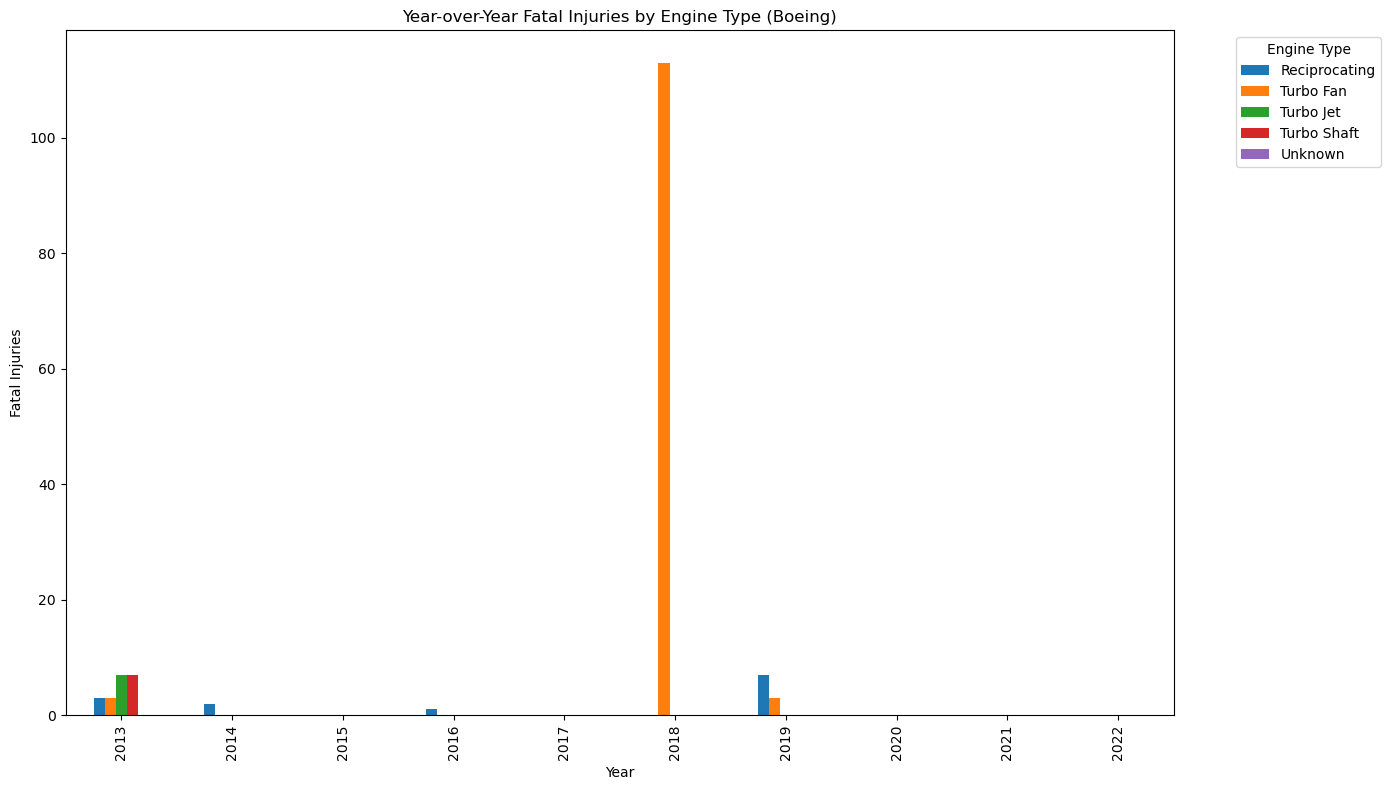

In [69]:
fatal_injuries_by_engine = boeing_injuries_by_engine.pivot_table(
    values='Total.Fatal.Injuries',
    index='Year',
    columns='Engine.Type',
    aggfunc='sum',
    fill_value=0
)

fatal_injuries_by_engine.plot(kind='bar', figsize=(14, 8), stacked=False, title='Year-over-Year Fatal Injuries by Engine Type (Boeing)')
plt.xlabel('Year')
plt.ylabel('Fatal Injuries')
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [70]:
df.to_csv("jan_22_project_df.csv", index=False)